1. Familiarise yourself with your data, ideally with some descriptive plots and statistics. 



2. Develop a simple model predicting units from prices (e.g. using elasticities) for all products, 
so a model describing the distribution (or a point estimate) of units | price, product attributes. 
Fit the model to the data and provide some estimate of the risk of your model against a baseline. 

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols
import scipy
import warnings
warnings.filterwarnings("ignore")

In [2]:
product=pd.read_csv("data/product.csv")
sales=pd.read_csv("data/sales.csv")

In [3]:
product.head()

Unnamed: 0     brand       flavour  volume_per_joghurt_g  packsize  \
0           0   Mueller     blueberry                   150         6   
1           1     Oikos     chocolate                  1000         1   
2           2  Alnatura    strawberry                  1000         1   
3           3   Mueller  straciatella                   500         6   
4           4    Danone  straciatella                   150         6   

   product_id  
0           0  
1           1  
2           2  
3           3  
4           4

In [4]:
sales.head()

Unnamed: 0        date  product_id  price   units
0           0  2020-01-01           0   4.65  1126.0
1           1  2020-01-02           0   4.76  1205.0
2           2  2020-01-03           0   5.22  1007.0
3           3  2020-01-04           0   5.45  1282.0
4           4  2020-01-05           0   3.33  1037.0

In [5]:
product["brand"].value_counts()

Danone               5
Mueller              4
Oikos                4
Rewe                 4
Alnatura             3
Activia              2
Ja!                  2
Ecke-Mit-Was-Drin    2
Actimel              1
Name: brand, dtype: int64

In [6]:
product=product.sort_values('brand')


In [7]:
product[["brand","product_id"]]

brand  product_id
19            Actimel          19
23            Activia          23
9             Activia           9
2            Alnatura           2
6            Alnatura           6
8            Alnatura           8
13             Danone          13
4              Danone           4
5              Danone           5
21             Danone          21
25             Danone          25
22  Ecke-Mit-Was-Drin          22
12  Ecke-Mit-Was-Drin          12
11                Ja!          11
16                Ja!          16
17            Mueller          17
0             Mueller           0
10            Mueller          10
3             Mueller           3
18              Oikos          18
1               Oikos           1
15              Oikos          15
26              Oikos          26
14               Rewe          14
20               Rewe          20
7                Rewe           7
24               Rewe          24

The Price Elasticity of Demand is the variation in the percentage of the demand given a 1% change in price, so it’s given by:


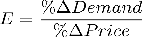



In [188]:
data_rewe=sales[sales.product_id==14].drop(["Unnamed: 0","product_id"],axis=1) #rewe blueberry 
data_rewe["% Change in Demand"] = data_rewe["units"].pct_change()
data_rewe["% Change in Price"] = data_rewe["price"].pct_change()
print(data_rewe)

           date  price   units  % Change in Demand  % Change in Price
137  2020-01-01   8.76   215.0                 NaN                NaN
138  2020-01-03   7.02   630.0            1.930233          -0.198630
139  2020-01-04   6.08  1229.0            0.950794          -0.133903
140  2020-01-05   7.73   748.0           -0.391375           0.271382
141  2020-01-06   7.36   857.0            0.145722          -0.047865
142  2020-01-07   8.13   545.0           -0.364061           0.104620
143  2020-01-08   6.75   936.0            0.717431          -0.169742
144  2020-01-09   7.47   274.0           -0.707265           0.106667


In [189]:
data_rewe["Price Elasticity"] = data_rewe["% Change in Demand"] / data_rewe["% Change in Price"]
print(data_rewe)

           date  price   units  % Change in Demand  % Change in Price  \
137  2020-01-01   8.76   215.0                 NaN                NaN   
138  2020-01-03   7.02   630.0            1.930233          -0.198630   
139  2020-01-04   6.08  1229.0            0.950794          -0.133903   
140  2020-01-05   7.73   748.0           -0.391375           0.271382   
141  2020-01-06   7.36   857.0            0.145722          -0.047865   
142  2020-01-07   8.13   545.0           -0.364061           0.104620   
143  2020-01-08   6.75   936.0            0.717431          -0.169742   
144  2020-01-09   7.47   274.0           -0.707265           0.106667   

     Price Elasticity  
137               NaN  
138         -9.717723  
139         -7.100608  
140         -1.442158  
141         -3.044407  
142         -3.479853  
143         -4.226606  
144         -6.630609  


So, even when the prices increase, the demand is not significantly affected.

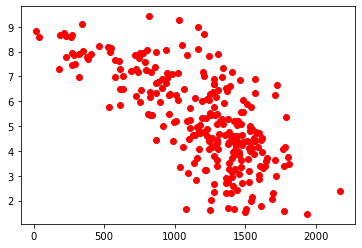

In [78]:
plt.plot(sales["units"],sales["price"], 'ro')

As expected, there is a decreasing trend in data set. If price increase, demand for a yogurt will decrease. I want to look that trend by grouping with brand names

Text(0.5, 1.0, 'Price - Units Graphs for Brand Mueller')

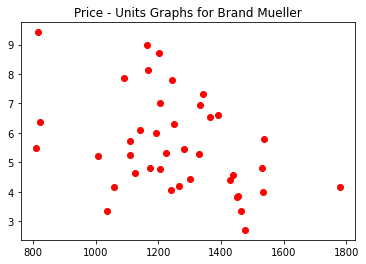

In [9]:
#mueller
x=[0,3,10,17]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Mueller")

Text(0.5, 1.0, 'Price - Units Graphs for Brand Rewe')

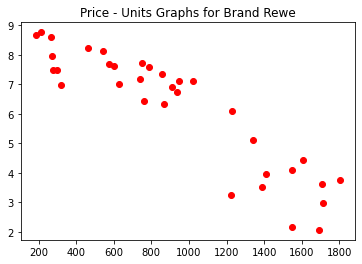

In [10]:
#rewe
x=[7,14,20,24]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Rewe")

Text(0.5, 1.0, 'Price - Units Graphs for Brand Oikos')

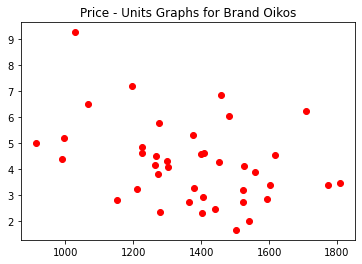

In [11]:
#oikos
x=[1,15,18,26]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Oikos")

Text(0.5, 1.0, 'Price - Units Graphs for Brand Alnatura')

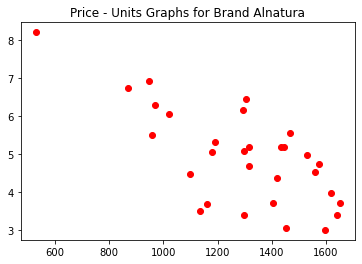

In [12]:
#alnatura
x=[2,6,8]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Alnatura")

Text(0.5, 1.0, 'Price - Units Graphs for Brand Danone')

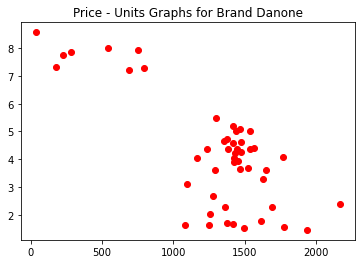

In [13]:
#danone
x=[4,5,13,21,25]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Danone")

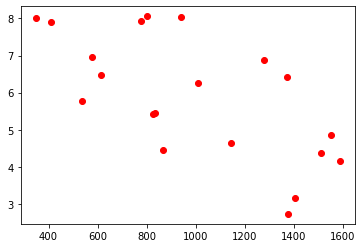

In [14]:
#Activia
x=[9,23]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')

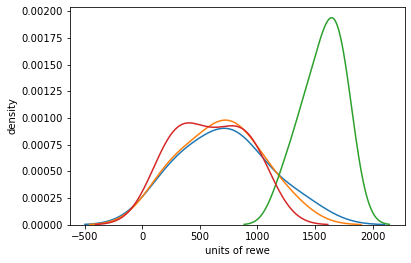

In [15]:
sns.kdeplot(sales.units[sales.product_id == 7]);
sns.kdeplot(sales.units[sales.product_id == 14]);
sns.kdeplot(sales.units[sales.product_id == 20]);
sns.kdeplot(sales.units[sales.product_id == 24]);


# beautifying the labels
plt.xlabel('units of rewe')
plt.ylabel('density')
plt.show()

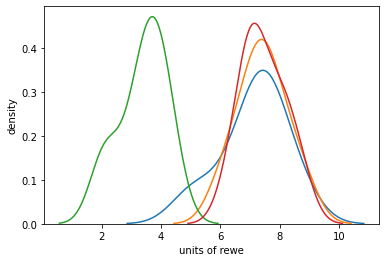

In [16]:
#price dist
sns.kdeplot(sales.price[sales.product_id == 7]);
sns.kdeplot(sales.price[sales.product_id == 14]);
sns.kdeplot(sales.price[sales.product_id == 20]);
sns.kdeplot(sales.price[sales.product_id == 24]);


# beautifying the labels
plt.xlabel('price of rewe')
plt.ylabel('density')
plt.show()

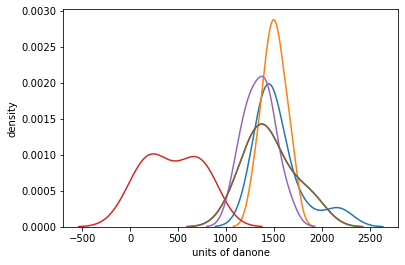

In [17]:
sns.kdeplot(sales.units[sales.product_id == 13]);
sns.kdeplot(sales.units[sales.product_id == 4]);
sns.kdeplot(sales.units[sales.product_id == 5]);
sns.kdeplot(sales.units[sales.product_id == 21]);
sns.kdeplot(sales.units[sales.product_id == 25]);
sns.kdeplot(sales.units[sales.product_id == 5]);

# beautifying the labels
plt.xlabel('units of danone')
plt.ylabel('density')
plt.show()

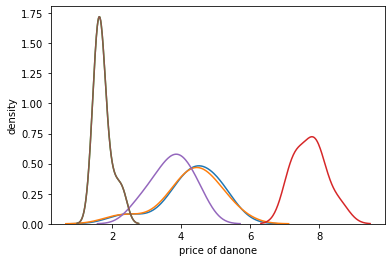

In [87]:
sns.kdeplot(sales.price[sales.product_id == 13]);
sns.kdeplot(sales.price[sales.product_id == 4]);
sns.kdeplot(sales.price[sales.product_id == 5]);
sns.kdeplot(sales.price[sales.product_id == 21]);
sns.kdeplot(sales.price[sales.product_id == 25]);
sns.kdeplot(sales.price[sales.product_id == 5]);

# beautifying the labels
plt.xlabel('price of danone')
plt.ylabel('density')
plt.show()

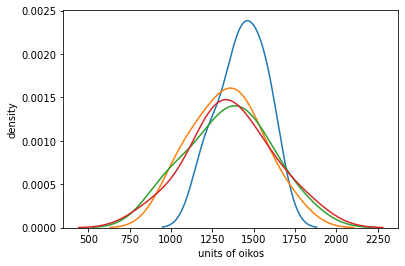

In [18]:
sns.kdeplot(sales.units[sales.product_id == 1]);
sns.kdeplot(sales.units[sales.product_id == 15]);
sns.kdeplot(sales.units[sales.product_id == 18]);
sns.kdeplot(sales.units[sales.product_id == 26]);


# beautifying the labels
plt.xlabel('units of oikos')
plt.ylabel('density')
plt.show()

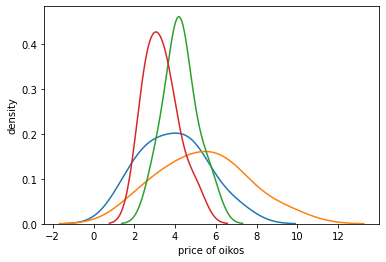

In [97]:
sns.kdeplot(sales.price[sales.product_id == 1]);
sns.kdeplot(sales.price[sales.product_id == 15]);
sns.kdeplot(sales.price[sales.product_id == 18]);
sns.kdeplot(sales.price[sales.product_id == 26]);


# beautifying the labels
plt.xlabel('price of oikos')
plt.ylabel('density')
plt.show()

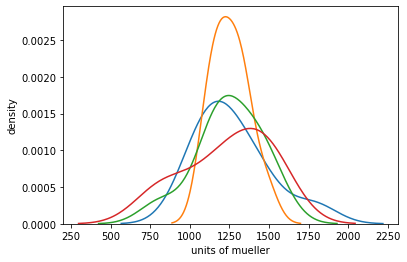

In [19]:
sns.kdeplot(sales.units[sales.product_id == 0]);
sns.kdeplot(sales.units[sales.product_id == 3]);
sns.kdeplot(sales.units[sales.product_id == 10]);
sns.kdeplot(sales.units[sales.product_id == 17]);



# beautifying the labels
plt.xlabel('units of mueller')
plt.ylabel('density')
plt.show()

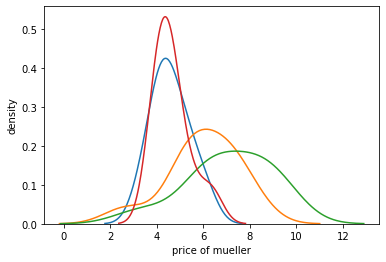

In [84]:
sns.kdeplot(sales.price[sales.product_id == 0]);
sns.kdeplot(sales.price[sales.product_id == 3]);
sns.kdeplot(sales.price[sales.product_id == 10]);
sns.kdeplot(sales.price[sales.product_id == 17]);



# beautifying the labels
plt.xlabel('price of mueller')
plt.ylabel('density')
plt.show()

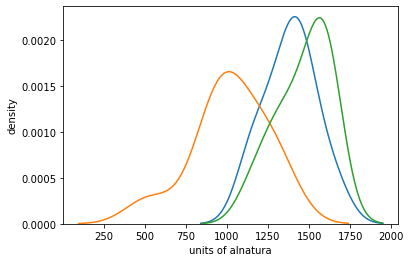

In [20]:
sns.kdeplot(sales.units[sales.product_id == 2]);
sns.kdeplot(sales.units[sales.product_id == 6]);
sns.kdeplot(sales.units[sales.product_id == 8]);



# beautifying the labels
plt.xlabel('units of alnatura')
plt.ylabel('density')
plt.show()

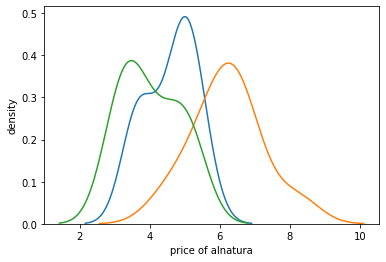

In [83]:
#price density
sns.kdeplot(sales.price[sales.product_id == 2]);
sns.kdeplot(sales.price[sales.product_id == 6]);
sns.kdeplot(sales.price[sales.product_id == 8]);



# beautifying the labels
plt.xlabel('price of alnatura')
plt.ylabel('density')
plt.show()

Transformation of price to make this look more linear

In [22]:
def normalize_data(df):
    # df on input should contain only one column with the price data (plus dataframe index)
    min = df.min()
    max = df.max()
    x = df 
    
    # time series normalization part
    # y will be a column in a dataframe
    y = (x - min) / (max - min)
    
    return y

In [23]:
#creating new data frames for each product
ids=list(range(27))

d = {}
for i in ids:
    d[i] = pd.DataFrame(sales[sales.product_id==i])

For each product I fited a linear model. I used LASSO to do this

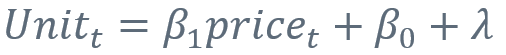

product 0
LASSO Regression Results:
R squared training set 34.91
R squared test set -280.11
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.5514
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.479
Time:                        16:36:21   Log-Likelihood:                -67.804
No. Observations:                  10   AIC:                             139.6
Df Residuals:                       8   BIC:                             140.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

-----------------------------------------------------------------------
product 5
LASSO Regression Results:
R squared training set 15.4
R squared test set -115.95
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.589
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.243
Time:                        16:36:23   Log-Likelihood:                -68.278
No. Observations:                  10   AIC:                             140.6
Df Residuals:                       8   BIC:                             141.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    

-----------------------------------------------------------------------
product 10
LASSO Regression Results:
R squared training set 50.04
R squared test set -19.36
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     11.45
Date:                Mon, 23 May 2022   Prob (F-statistic):            0.00959
Time:                        16:36:25   Log-Likelihood:                -62.570
No. Observations:                  10   AIC:                             129.1
Df Residuals:                       8   BIC:                             129.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

-----------------------------------------------------------------------
product 15
LASSO Regression Results:
R squared training set 0.0
R squared test set -147.86
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2.618
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.144
Time:                        16:36:27   Log-Likelihood:                -65.694
No. Observations:                  10   AIC:                             135.4
Df Residuals:                       8   BIC:                             136.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    

-----------------------------------------------------------------------
product 20
LASSO Regression Results:
R squared training set 0.0
R squared test set -74.4
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.117
Method:                 Least Squares   F-statistic:                   0.05816
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.815
Time:                        16:36:28   Log-Likelihood:                -65.523
No. Observations:                  10   AIC:                             135.0
Df Residuals:                       8   BIC:                             135.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

-----------------------------------------------------------------------
product 25
LASSO Regression Results:
R squared training set 0.0
R squared test set -3582.21
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.116
Method:                 Least Squares   F-statistic:                   0.06409
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.807
Time:                        16:36:30   Log-Likelihood:                -64.247
No. Observations:                  10   AIC:                             132.5
Df Residuals:                       8   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

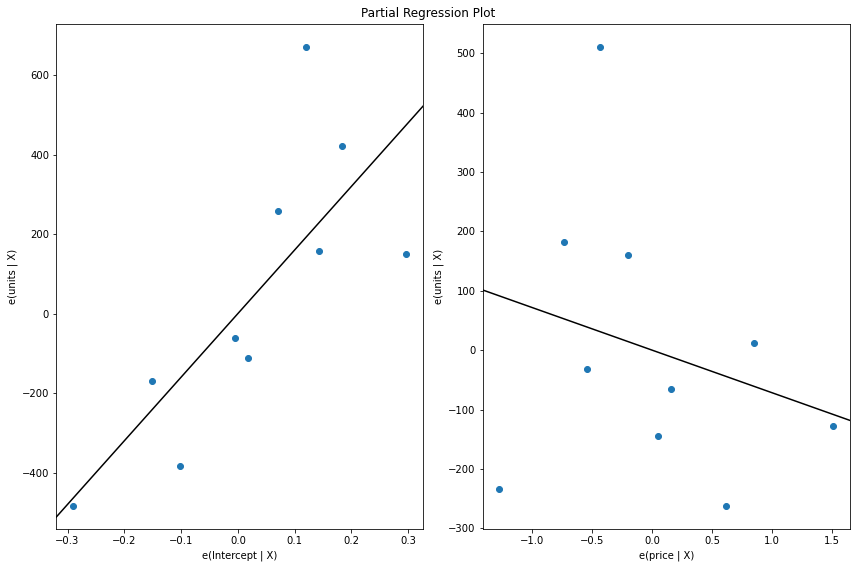

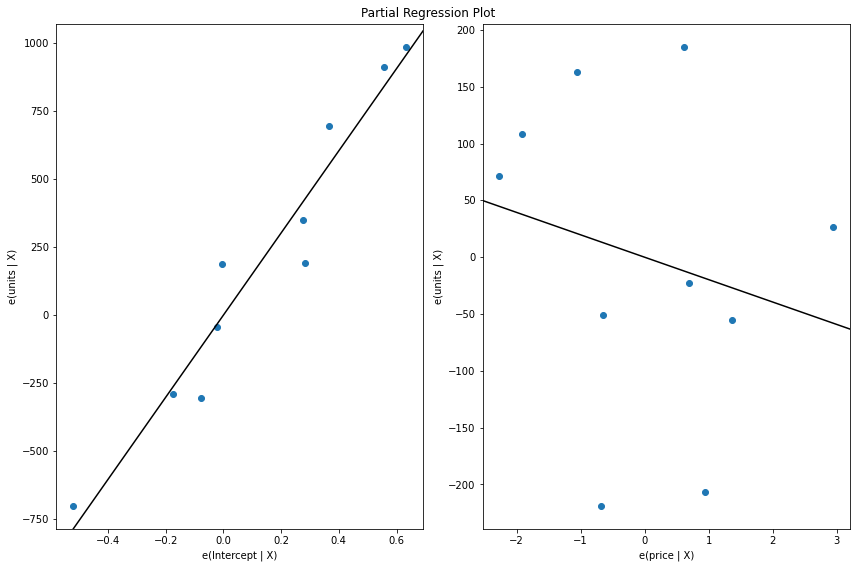

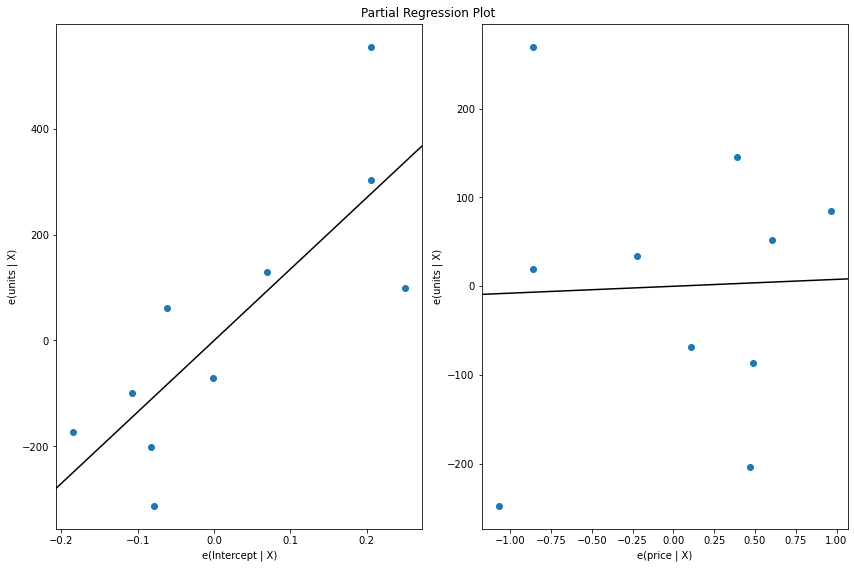

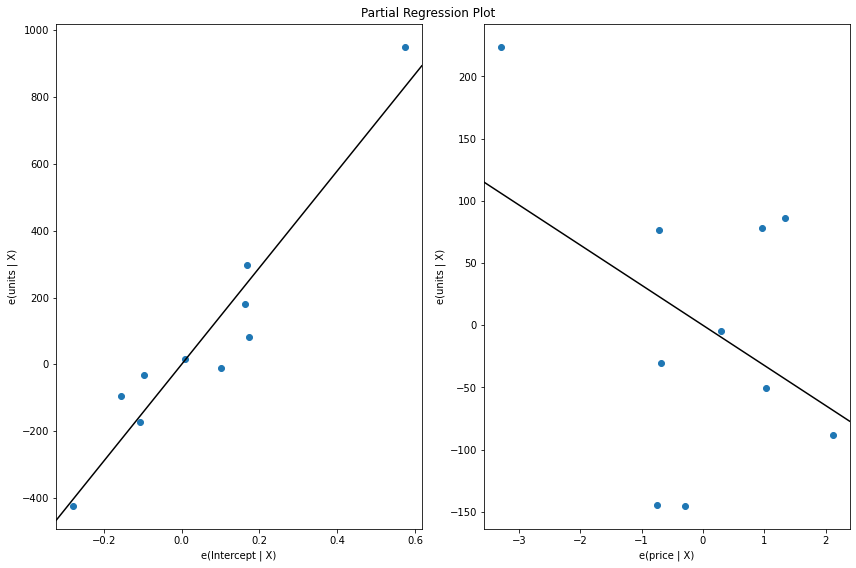

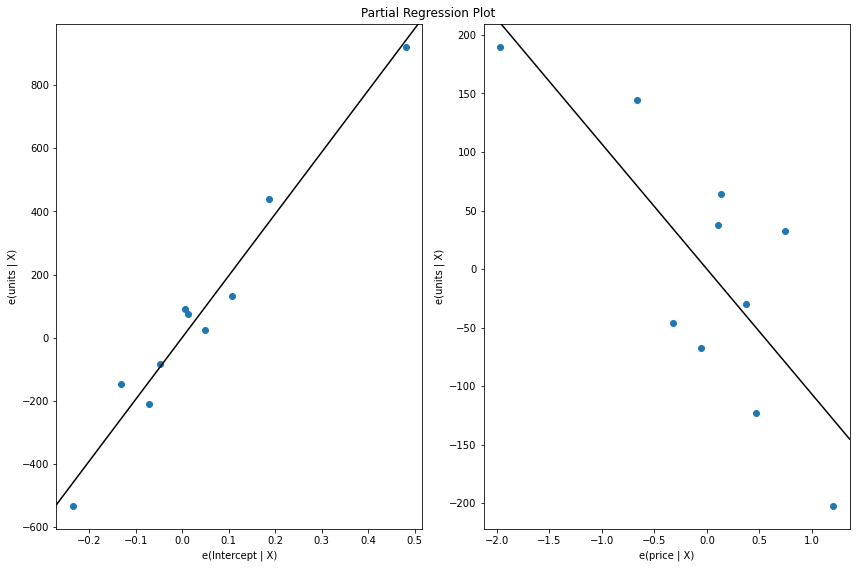

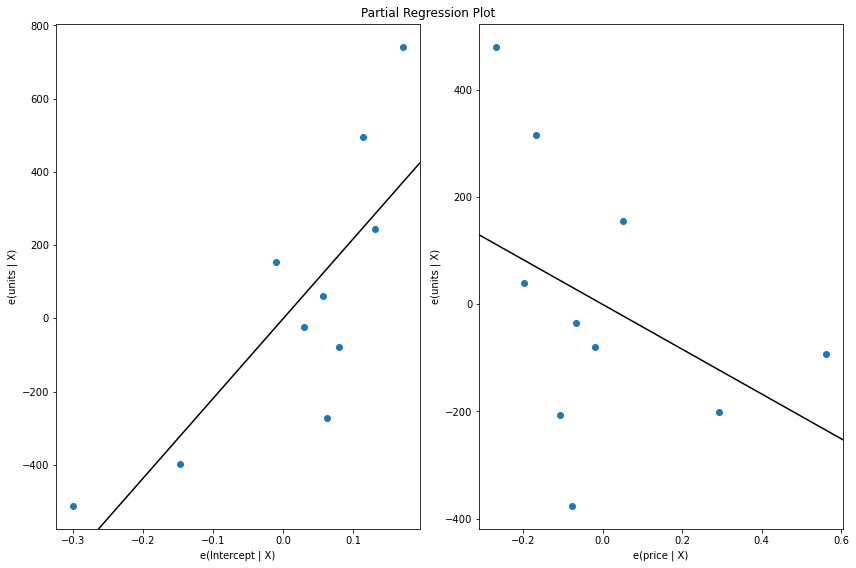

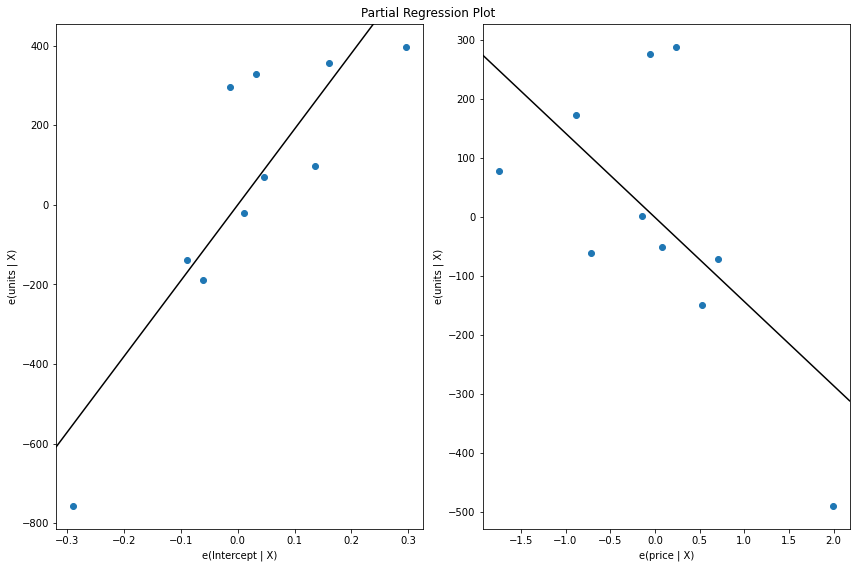

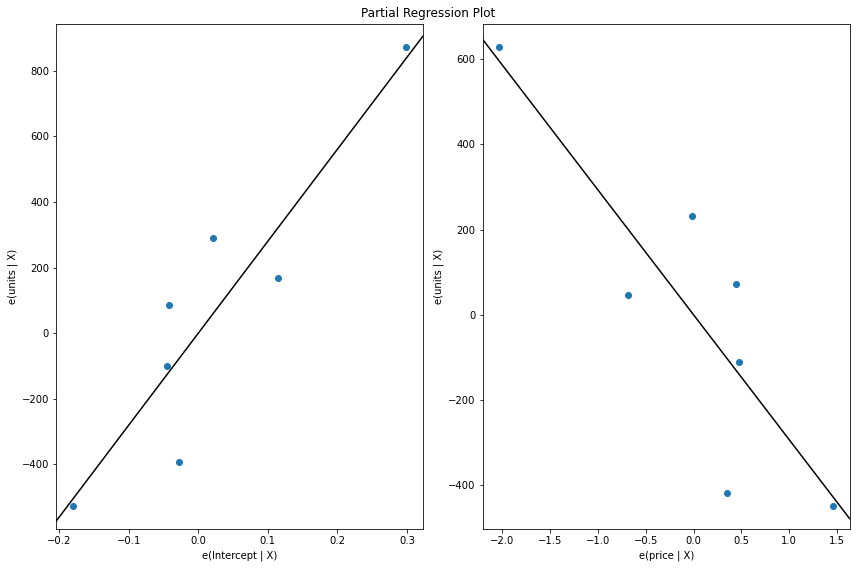

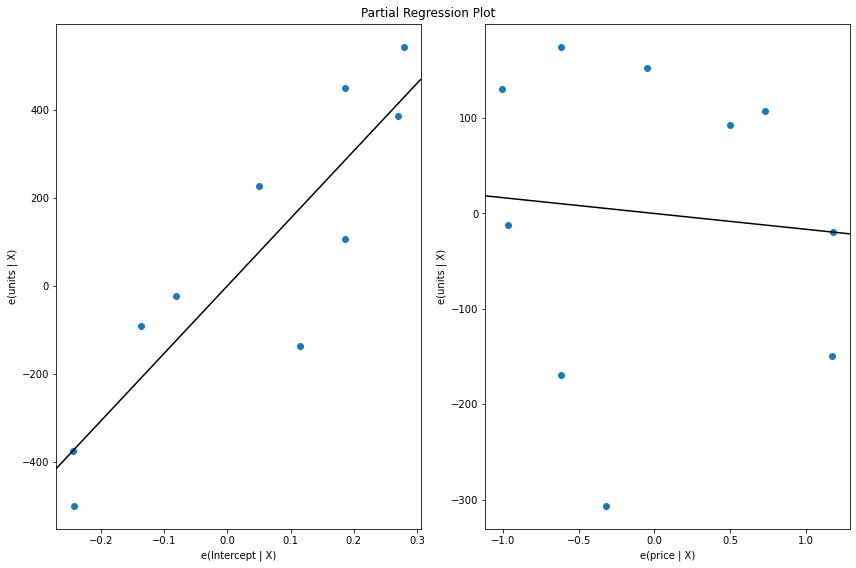

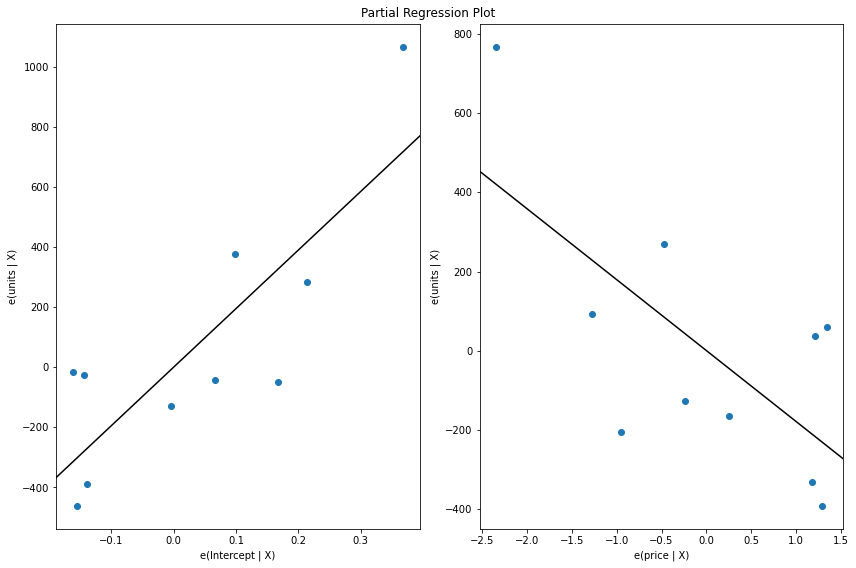

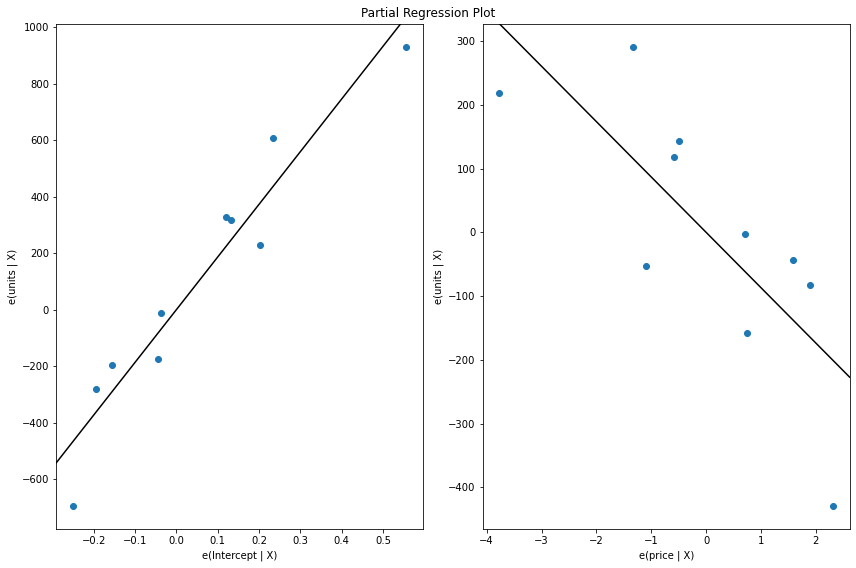

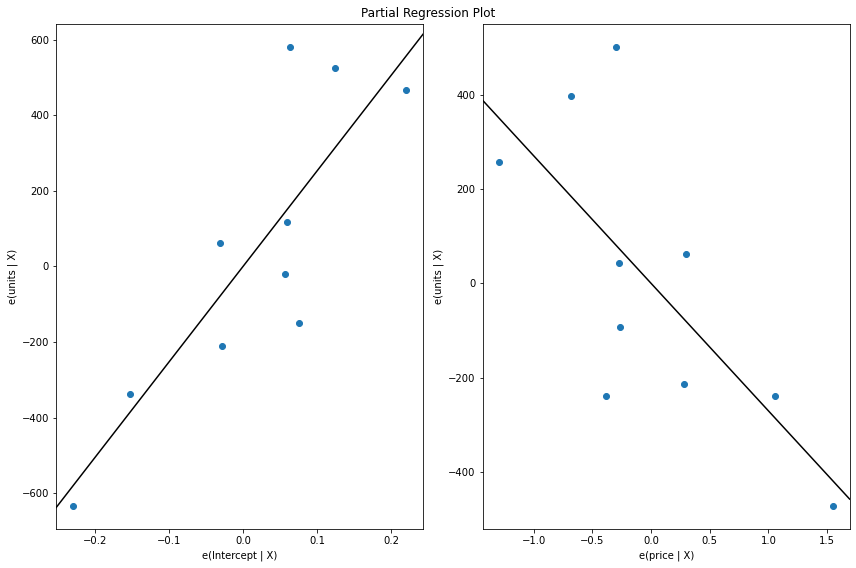

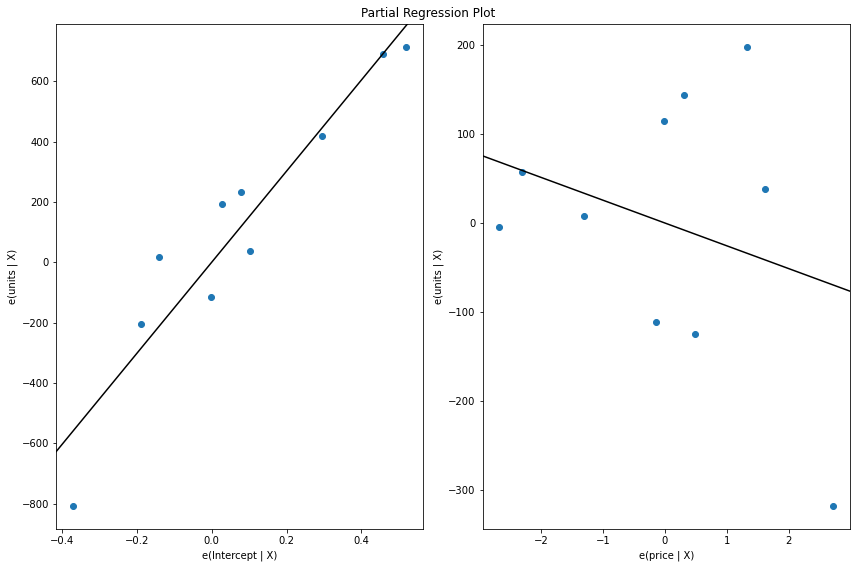

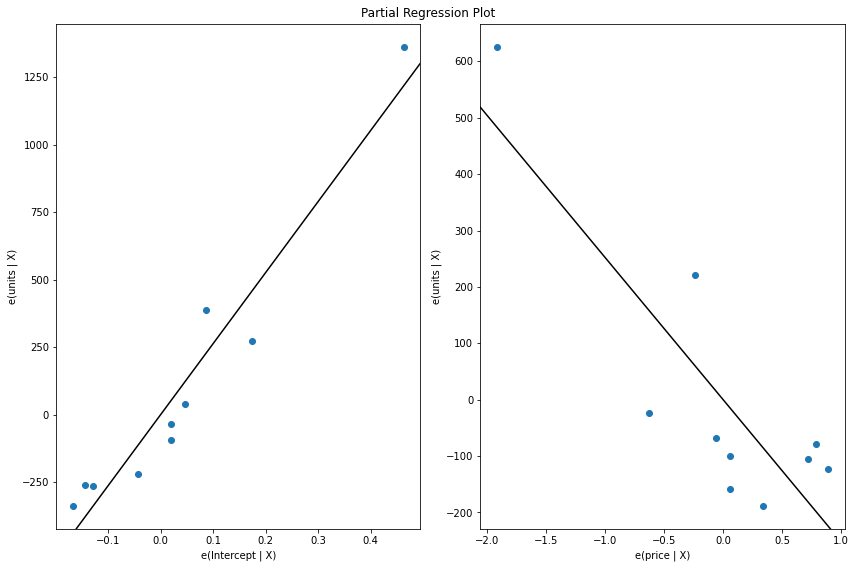

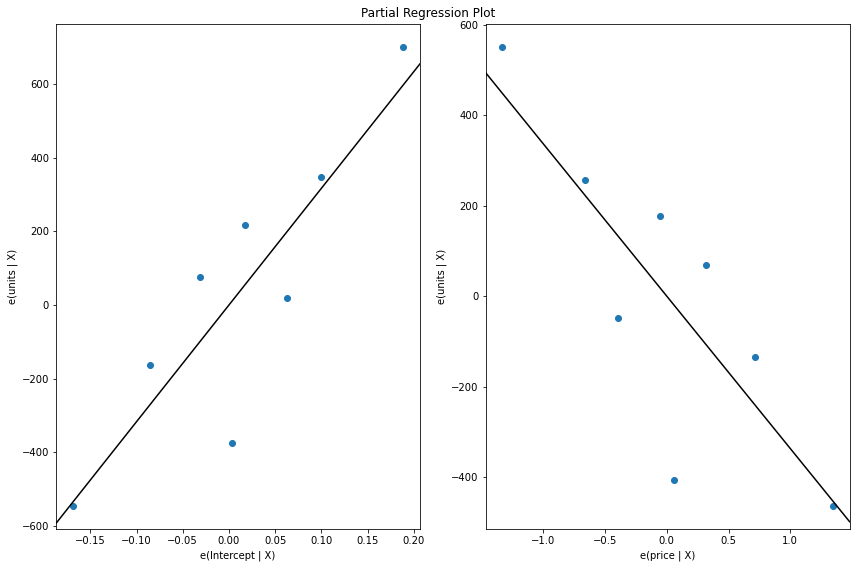

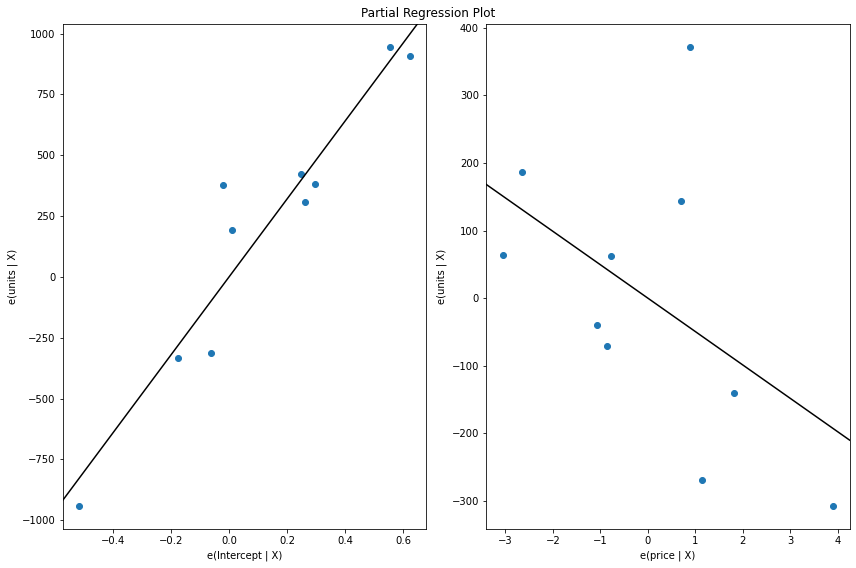

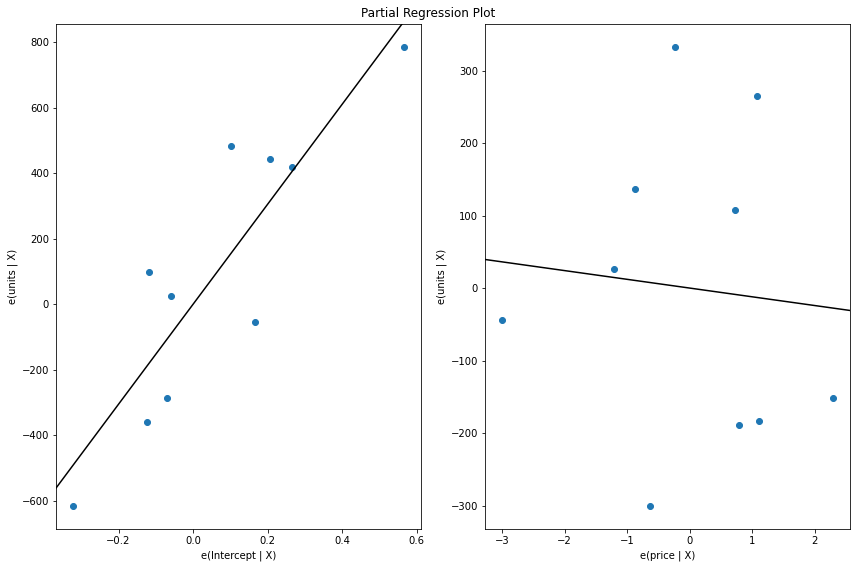

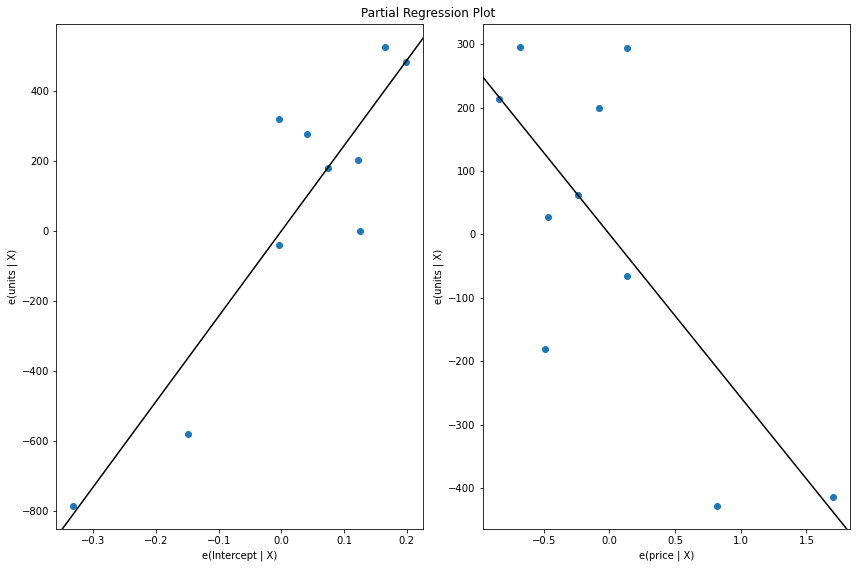

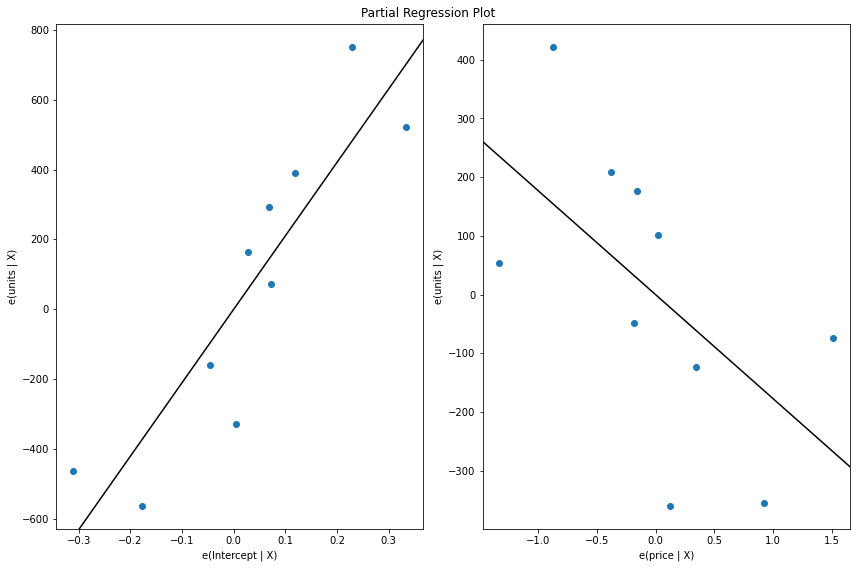

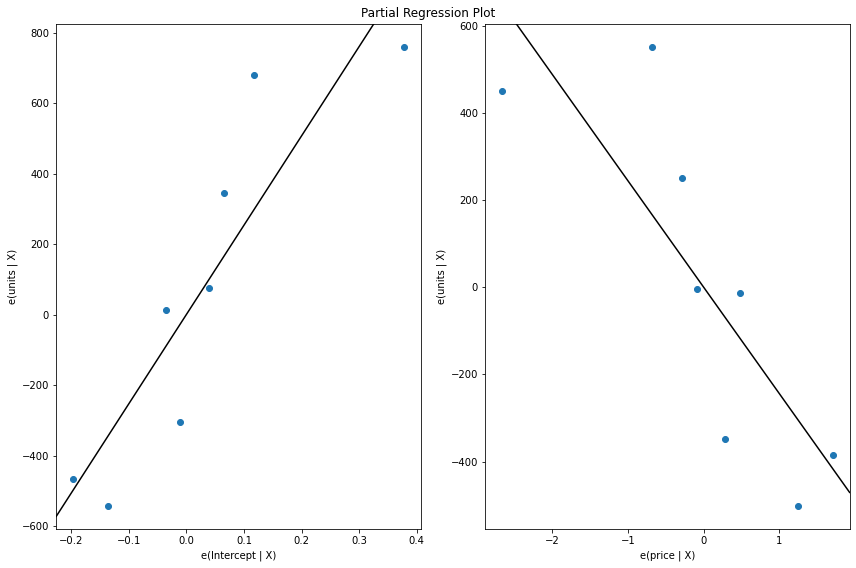

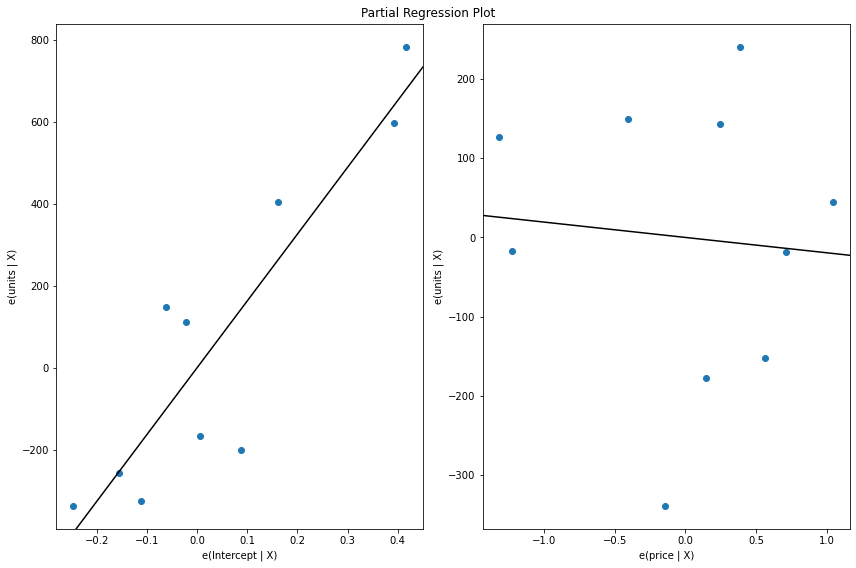

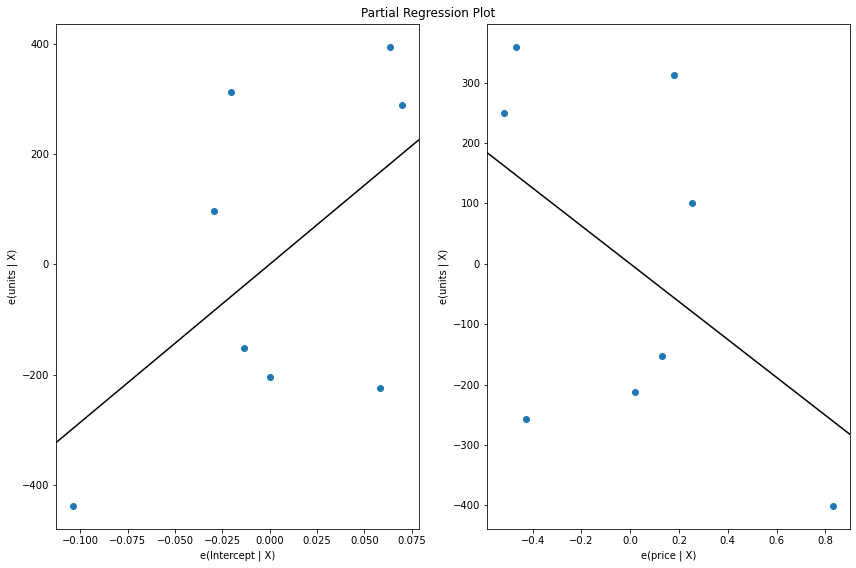

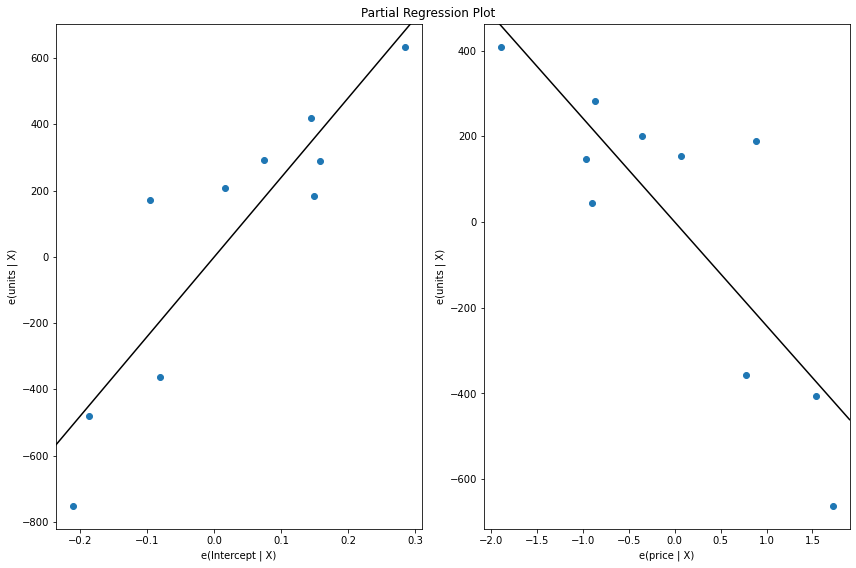

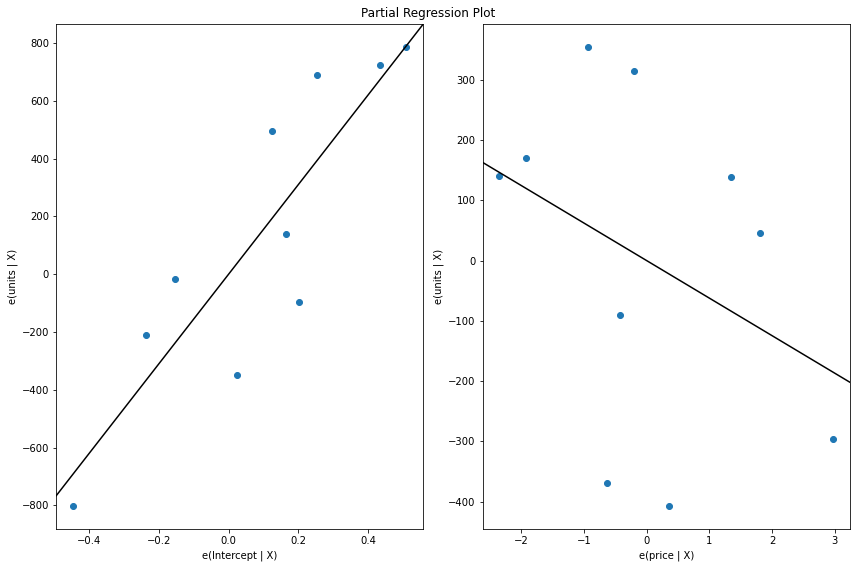

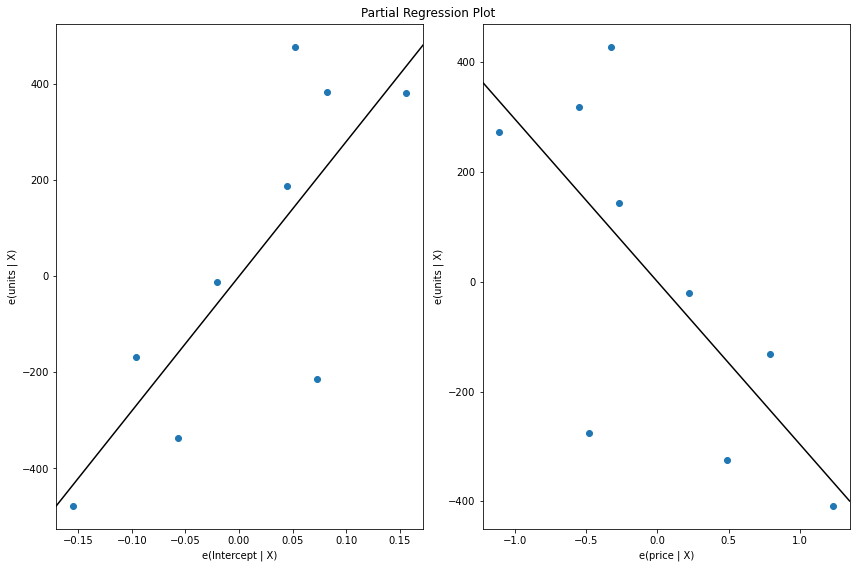

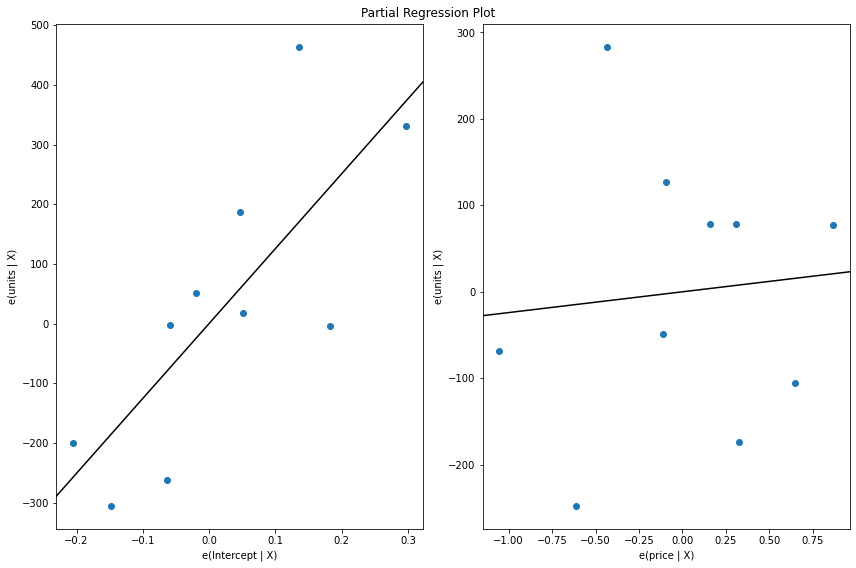

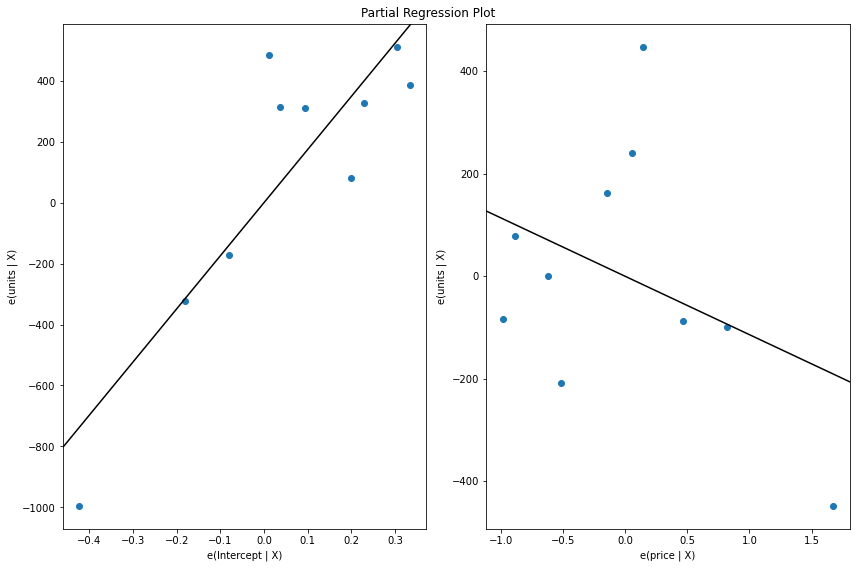

In [24]:
for k in range(0,27):
    X=d[k].price
    y=d[k].units

    X = normalize_data(X)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    X_train=X_train.values.reshape(-1,1)
    X_test=X_test.values.reshape(-1,1)


    model = LassoCV(cv=3, max_iter=10000)

    # Fit model
    model.fit(X_train, y_train)

    lasso_best = Lasso(alpha=model.alpha_)
    lasso_best.fit(X_train, y_train)
    
   
    
    print("product",k)
    
    print("LASSO Regression Results:")
    print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
    print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

    
    ols_model = ols("units ~ price", data=d[k]).fit()
    print(ols_model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(ols_model, fig=fig)
    
    print("-----------------------------------------------------------------------")



However this ignores time, the standard linear model assumes the observations are independent and given that we have a time element they might not be. 

I have a look at the autocorrelations of the residuals (ordered according to time) from the first model, they appear to be correlated over time then I need to take this into account. 

They are autocorrelated this would lead to something like

Unit_t = beta_1 Price_t + beta_2 Unit_t-1 + beta_0 

or 

Unit_t = beta_1 Price_t + beta_2 Price_t-1 + beta_0 


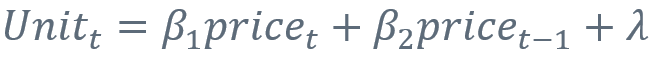

Product 0
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.318
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.327
Time:                        16:36:42   Log-Likelihood:                -66.539
No. Observations:                  10   AIC:                             139.1
Df Residuals:                       7   BIC:                             140.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1529.3724    180.159      8.48

-----------------------------------------------------------------------
Product 5
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.9199
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.442
Time:                        16:36:44   Log-Likelihood:                -68.017
No. Observations:                  10   AIC:                             142.0
Df Residuals:                       7   BIC:                             142.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

-----------------------------------------------------------------------
Product 10
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     9.581
Date:                Mon, 23 May 2022   Prob (F-statistic):            0.00991
Time:                        16:36:47   Log-Likelihood:                -60.420
No. Observations:                  10   AIC:                             126.8
Df Residuals:                       7   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

-----------------------------------------------------------------------
Product 15
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.260
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.341
Time:                        16:36:48   Log-Likelihood:                -65.572
No. Observations:                  10   AIC:                             137.1
Df Residuals:                       7   BIC:                             138.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

-----------------------------------------------------------------------
Product 20
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.273
Method:                 Least Squares   F-statistic:                   0.03568
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.965
Time:                        16:36:50   Log-Likelihood:                -65.509
No. Observations:                  10   AIC:                             137.0
Df Residuals:                       7   BIC:                             137.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

-----------------------------------------------------------------------
Product 25
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                 -0.099
Method:                 Least Squares   F-statistic:                    0.5942
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.578
Time:                        16:36:52   Log-Likelihood:                -63.503
No. Observations:                  10   AIC:                             133.0
Df Residuals:                       7   BIC:                             133.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

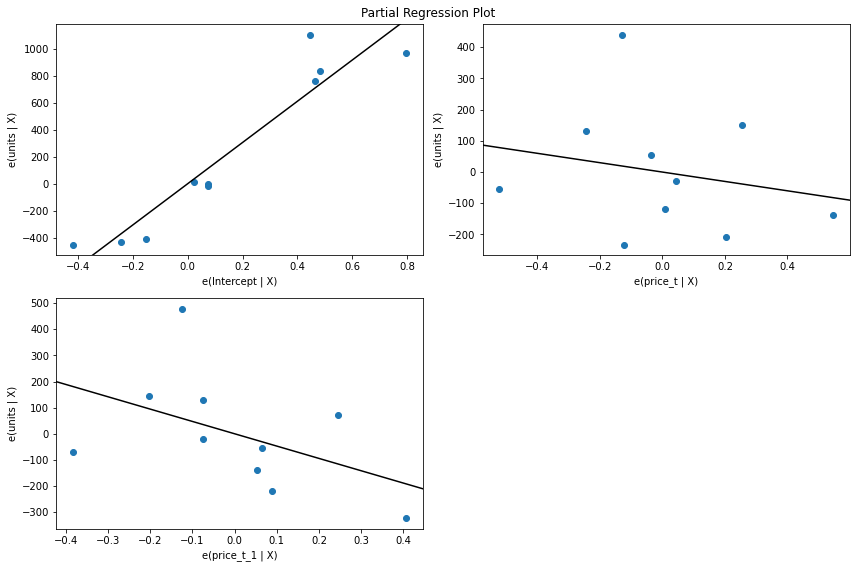

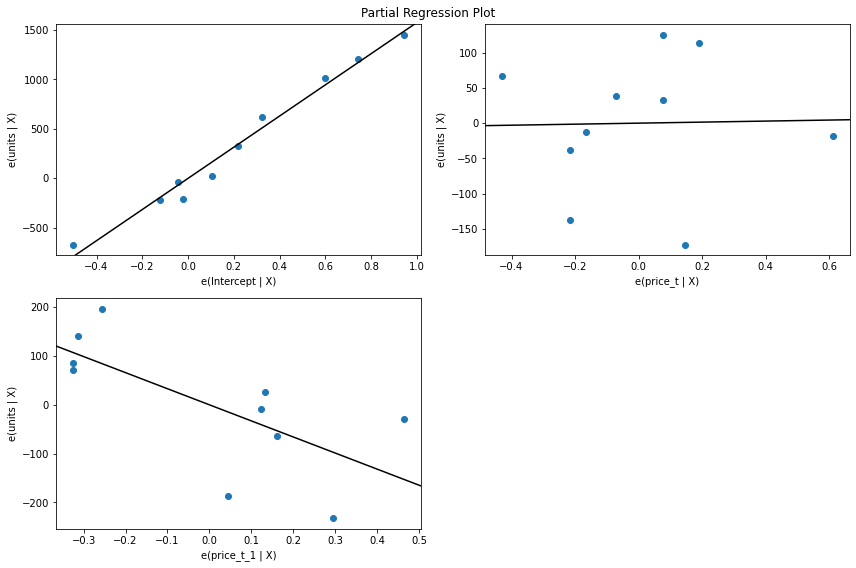

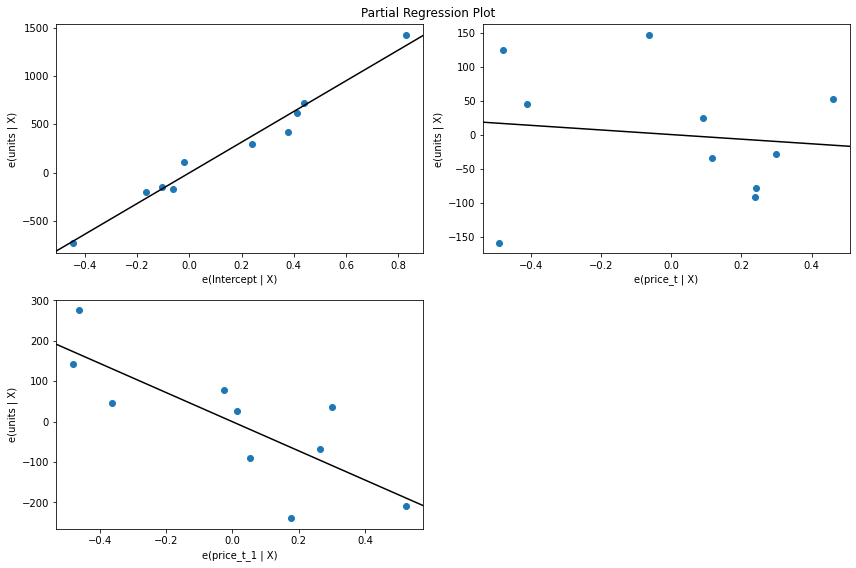

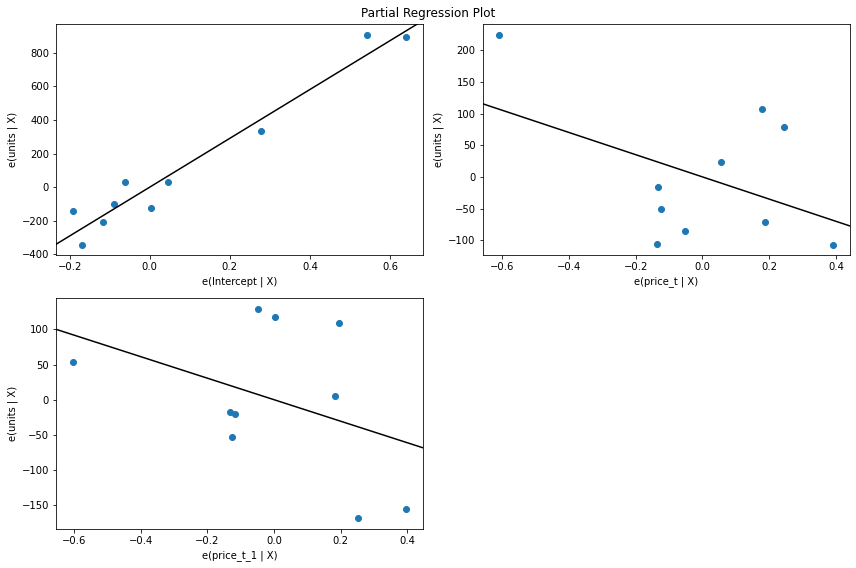

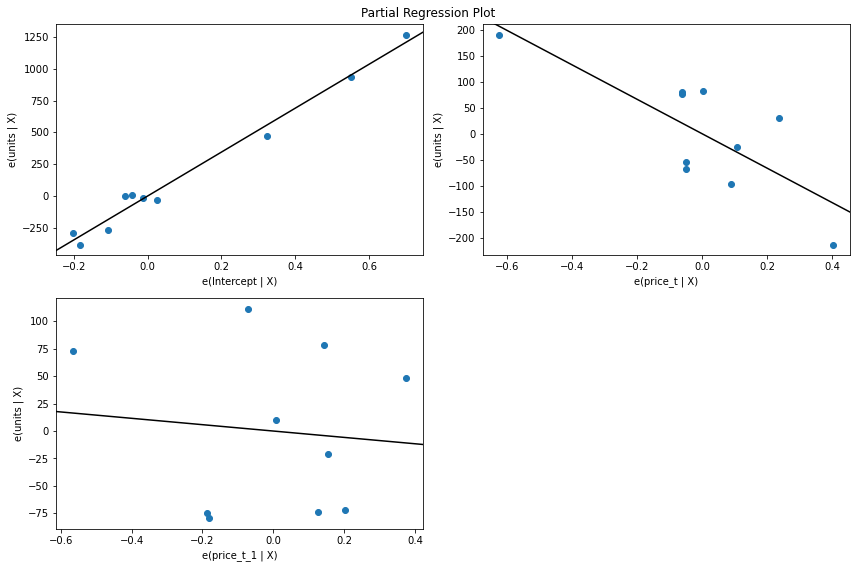

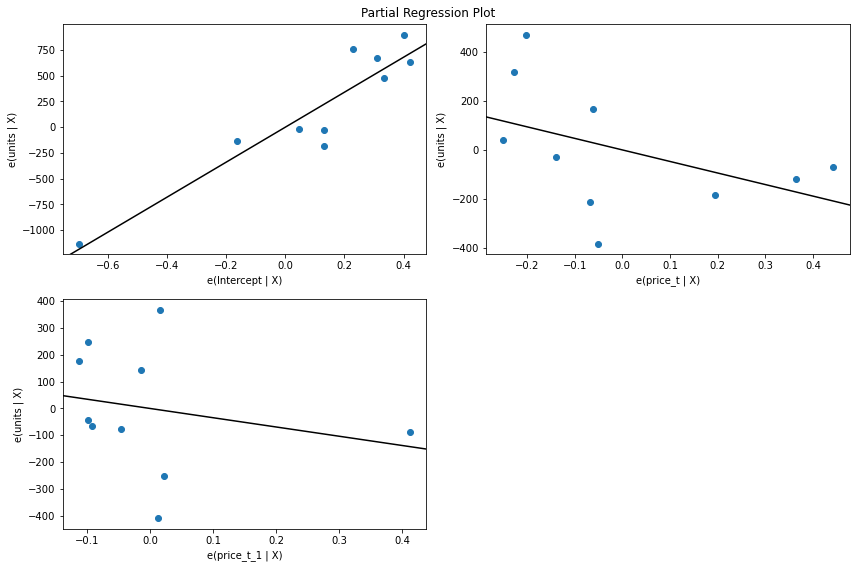

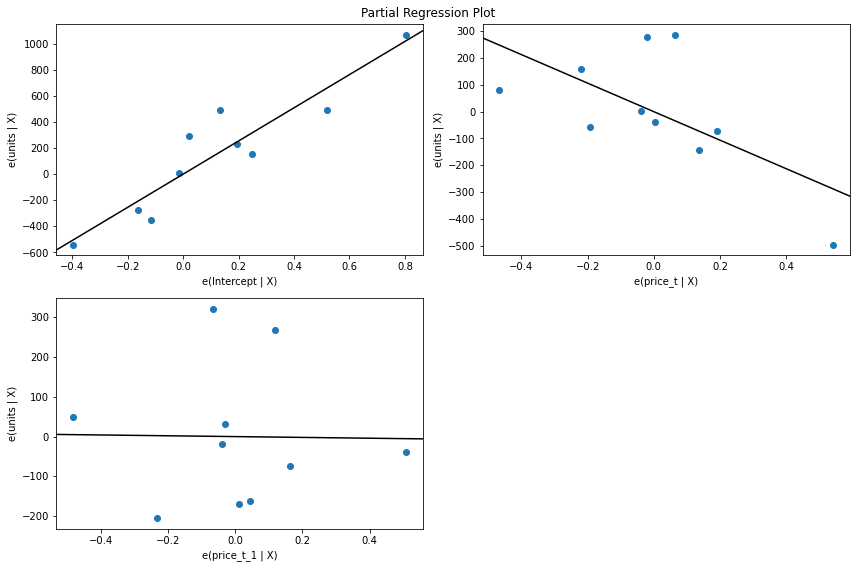

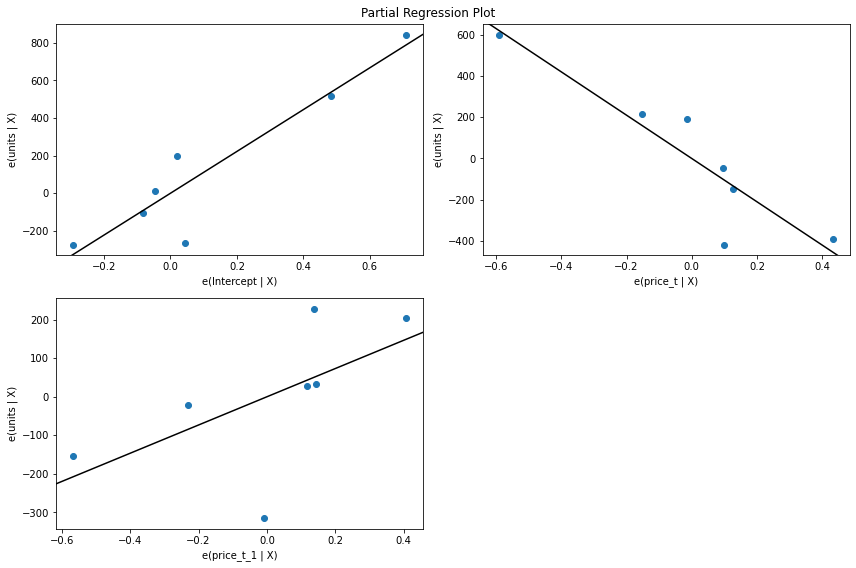

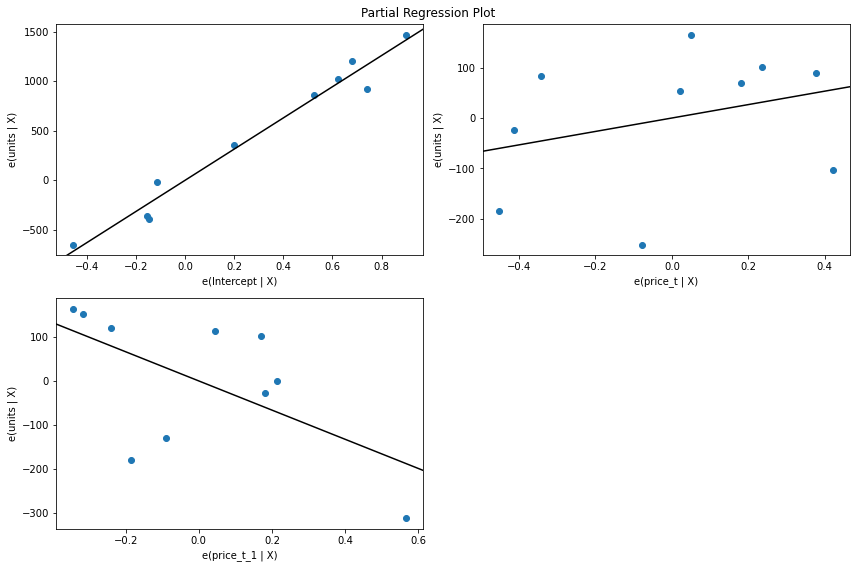

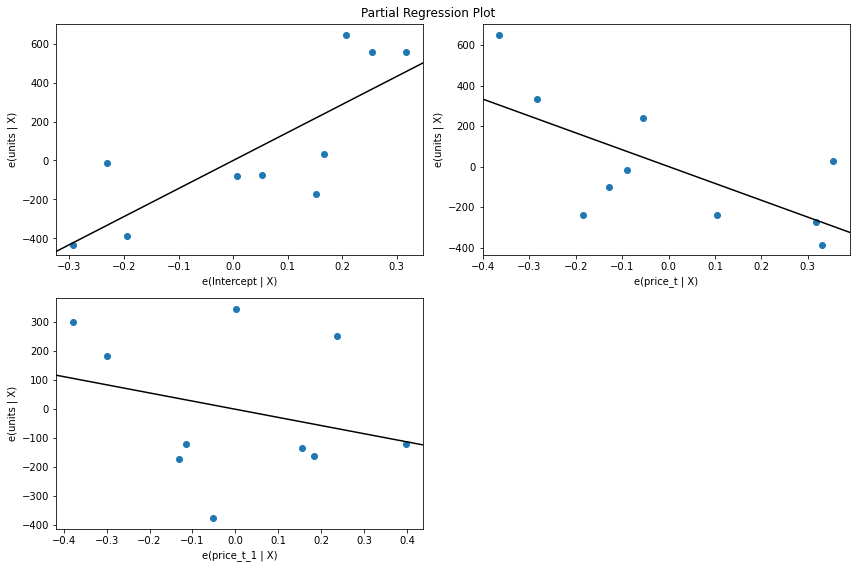

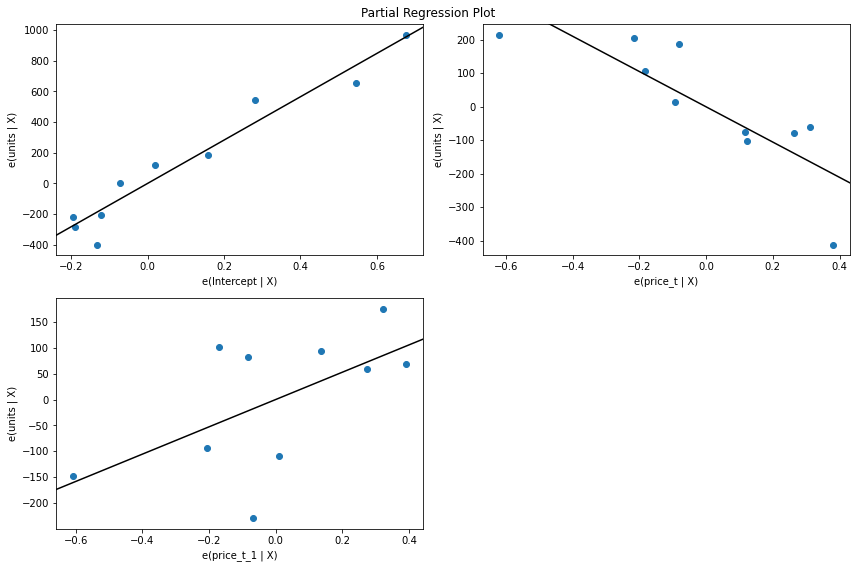

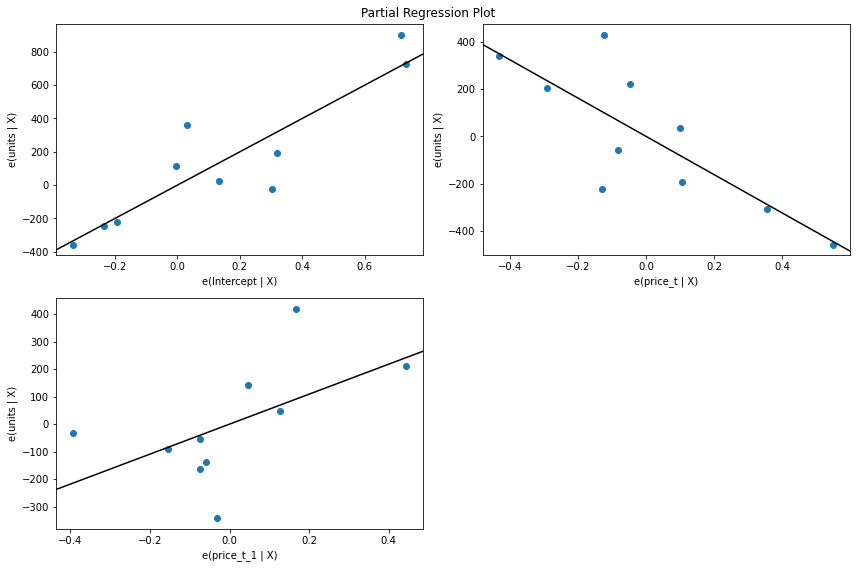

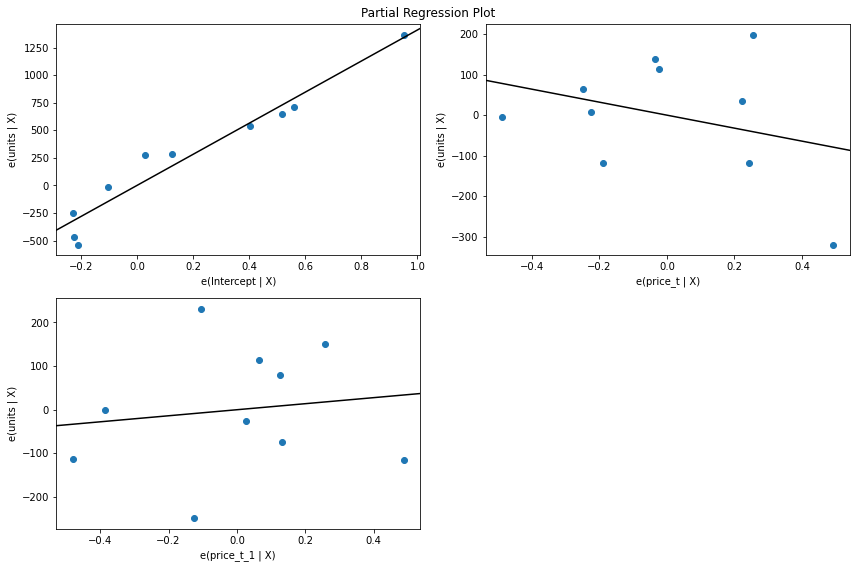

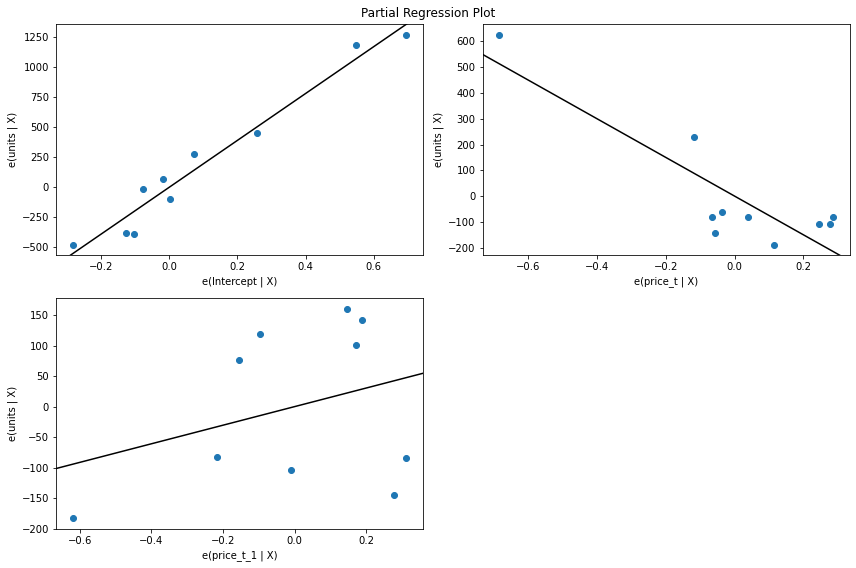

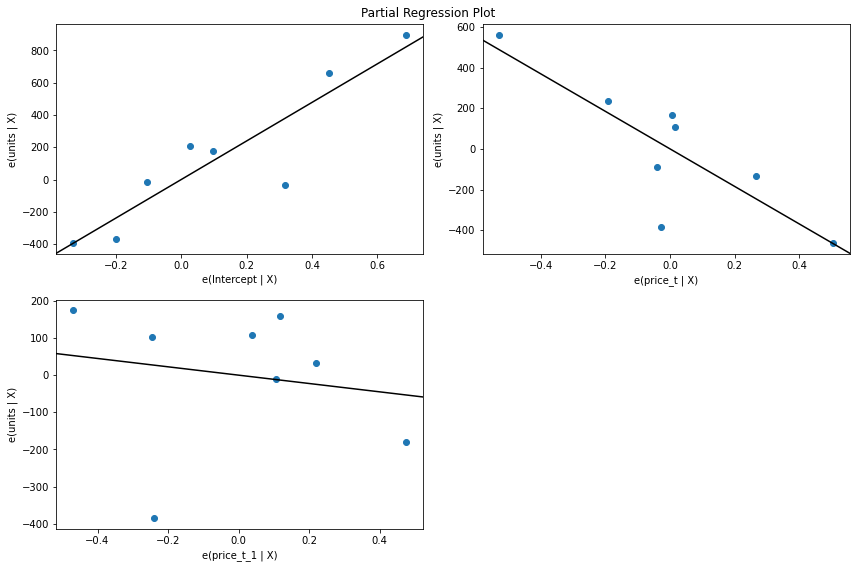

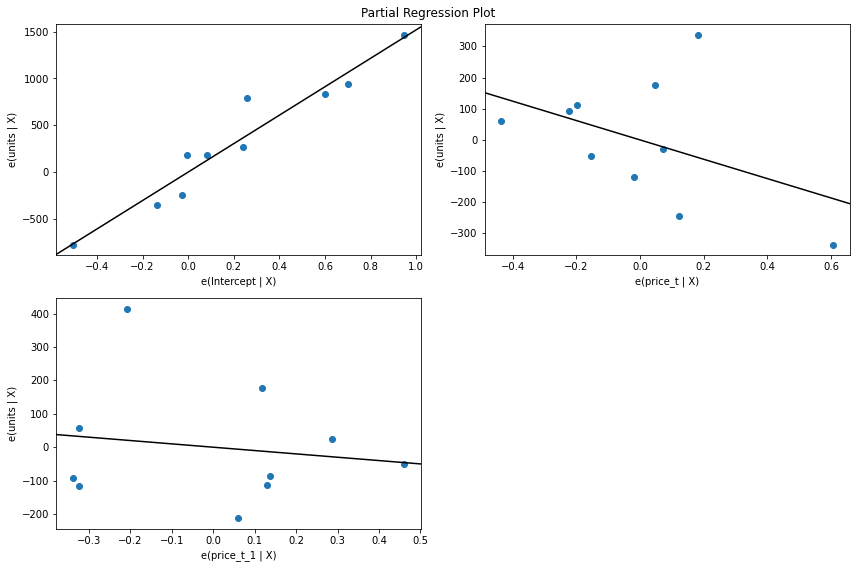

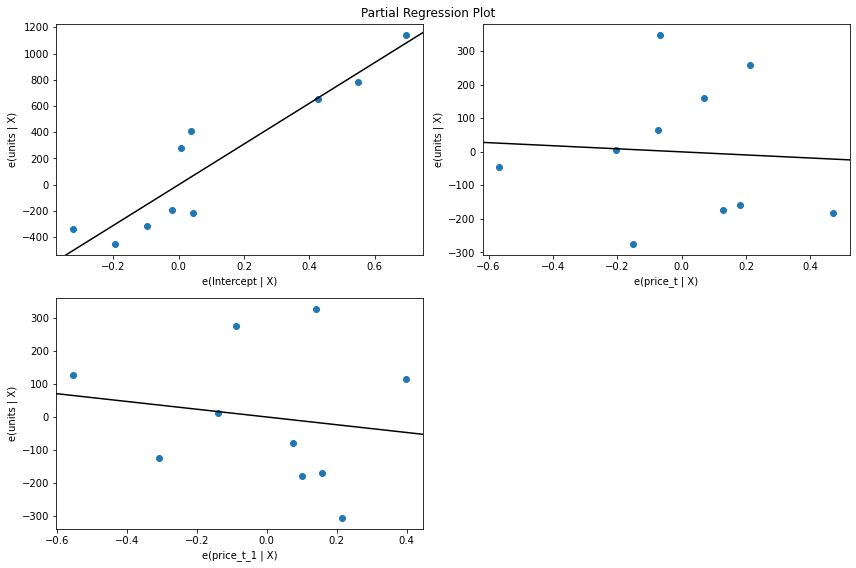

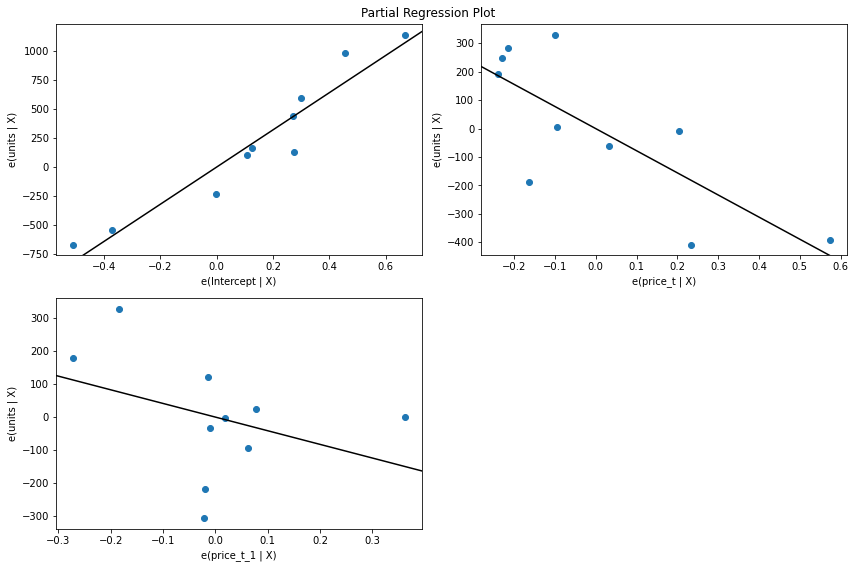

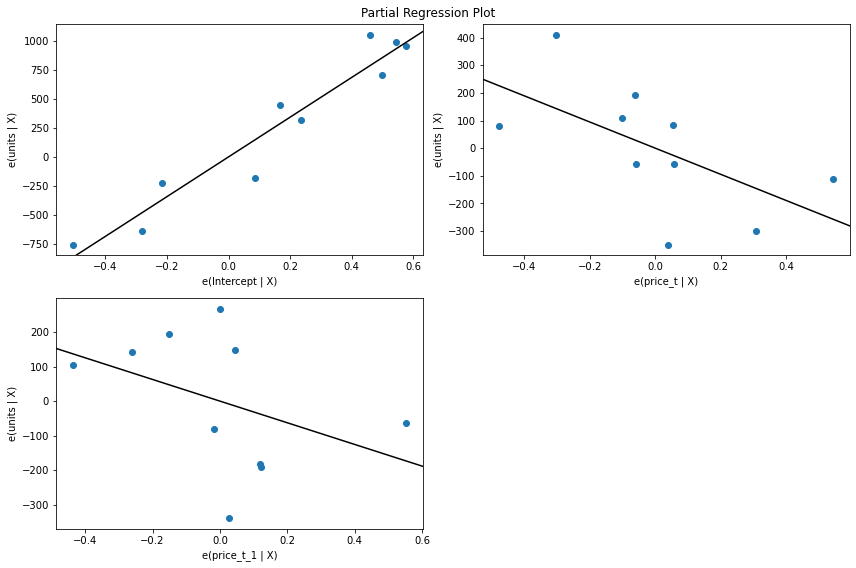

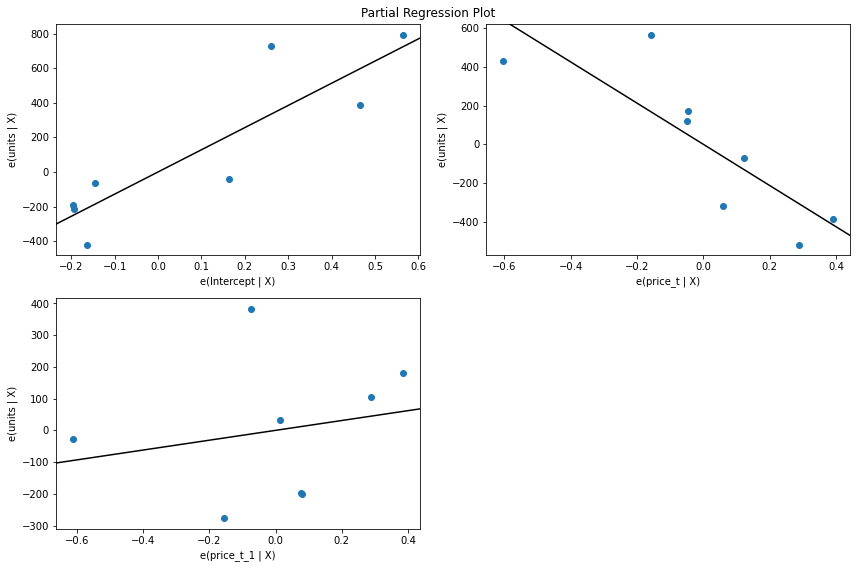

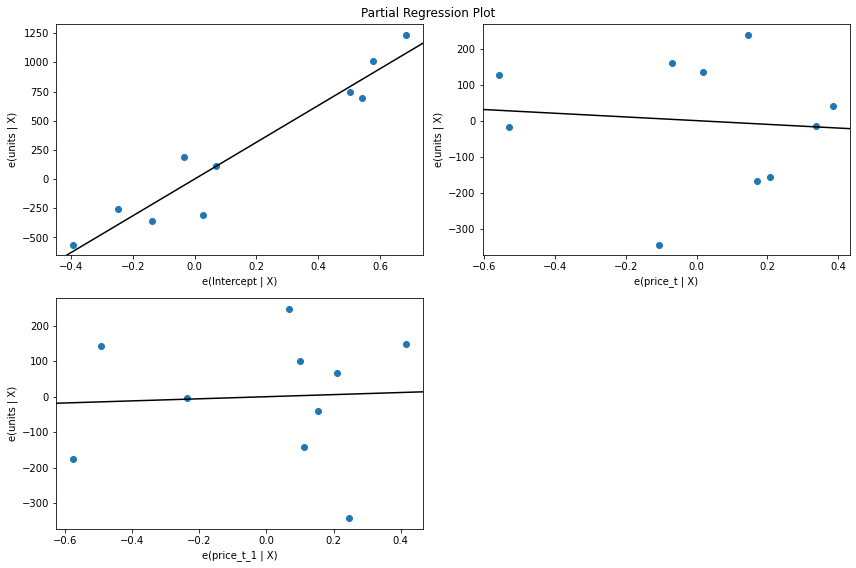

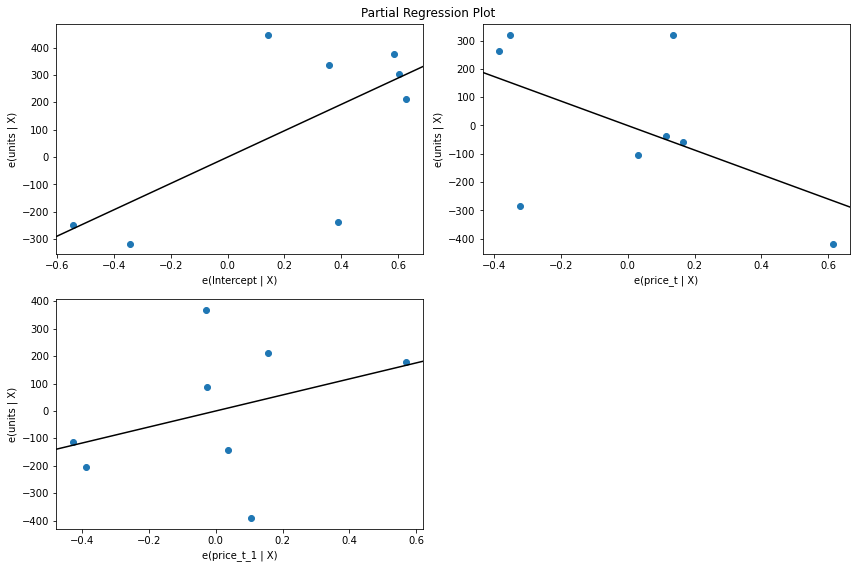

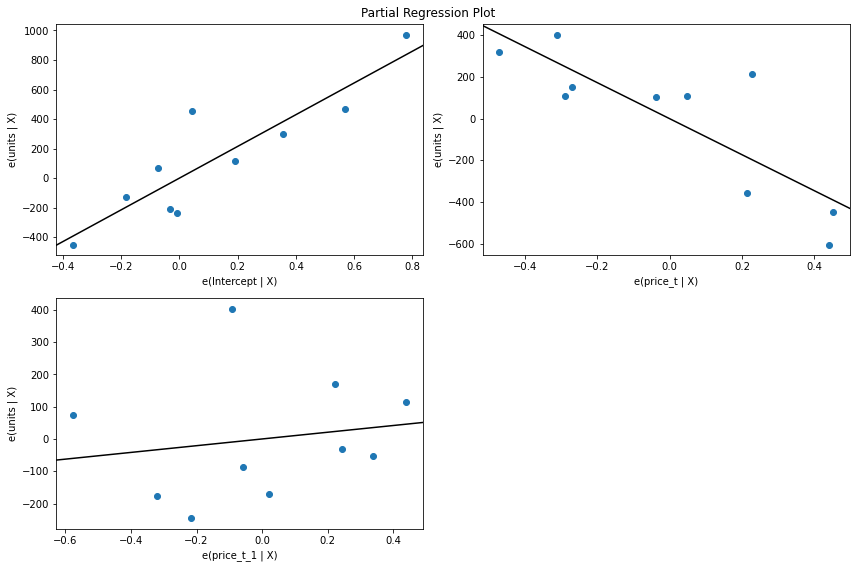

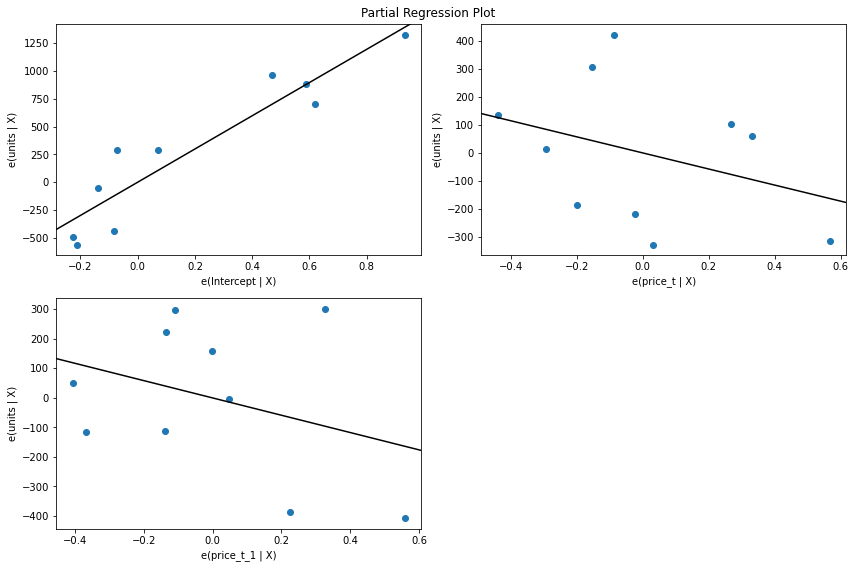

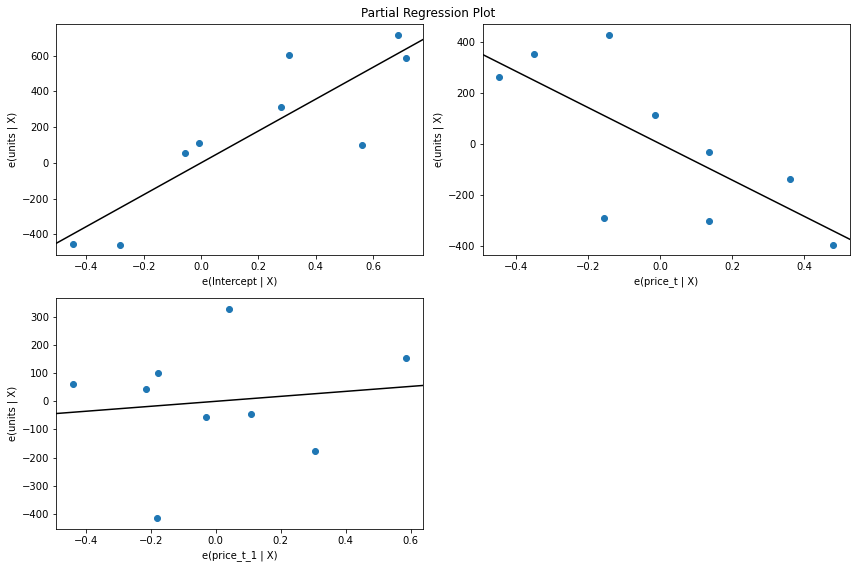

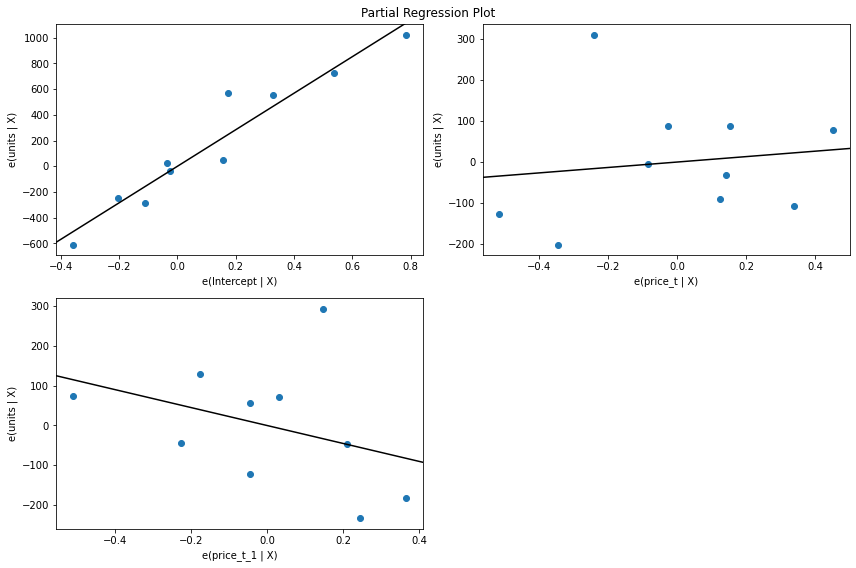

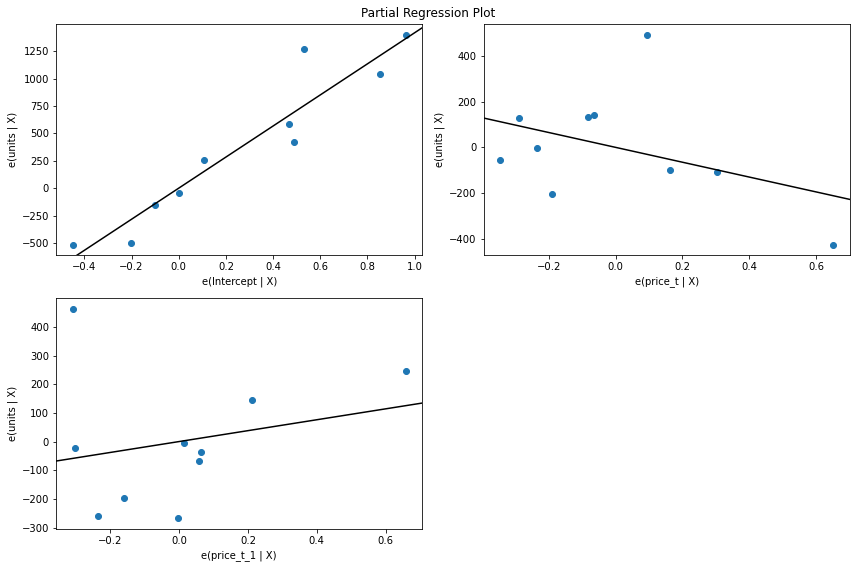

In [25]:
#model with price t-1
for k in range(0,27):
    train_data=d[k]
    train_data["price"] = normalize_data(train_data["price"])
    train_data=train_data.drop(["product_id","date","Unnamed: 0"],axis=1)
    train_data=pd.concat([train_data.price, train_data.price.shift(),train_data.units], axis=1)
    train_data.columns = ['price_t', 'price_t_1', 'units']
    train_data['price_t_1'].fillna(train_data['price_t'].mean(), inplace=True)
    
    model = ols("units ~ price_t+price_t_1", data=train_data).fit()
    
    print("Product",k)
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    
    print("-----------------------------------------------------------------------")



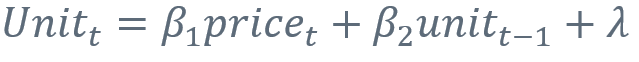

Product 0
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                 -0.155
Method:                 Least Squares   F-statistic:                    0.3972
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.686
Time:                        16:37:07   Log-Likelihood:                -67.600
No. Observations:                  10   AIC:                             141.2
Df Residuals:                       7   BIC:                             142.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1089.4497    525.508      2.07

-----------------------------------------------------------------------
Product 4
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     6.296
Date:                Mon, 23 May 2022   Prob (F-statistic):             0.0273
Time:                        16:37:09   Log-Likelihood:                -56.287
No. Observations:                  10   AIC:                             118.6
Df Residuals:                       7   BIC:                             119.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

-----------------------------------------------------------------------
Product 8
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                 -0.142
Method:                 Least Squares   F-statistic:                    0.4396
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.661
Time:                        16:37:11   Log-Likelihood:                -63.941
No. Observations:                  10   AIC:                             133.9
Df Residuals:                       7   BIC:                             134.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

-----------------------------------------------------------------------
Product 12
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                 -0.141
Method:                 Least Squares   F-statistic:                    0.4443
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.658
Time:                        16:37:13   Log-Likelihood:                -63.280
No. Observations:                  10   AIC:                             132.6
Df Residuals:                       7   BIC:                             133.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

-----------------------------------------------------------------------
Product 16
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.276
Method:                 Least Squares   F-statistic:                   0.02673
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.974
Time:                        16:37:14   Log-Likelihood:                -67.090
No. Observations:                  10   AIC:                             140.2
Df Residuals:                       7   BIC:                             141.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

-----------------------------------------------------------------------
Product 20
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.206
Method:                 Least Squares   F-statistic:                    0.2309
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.800
Time:                        16:37:15   Log-Likelihood:                -65.240
No. Observations:                  10   AIC:                             136.5
Df Residuals:                       7   BIC:                             137.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

-----------------------------------------------------------------------
Product 24
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     4.126
Date:                Mon, 23 May 2022   Prob (F-statistic):             0.0746
Time:                        16:37:17   Log-Likelihood:                -59.826
No. Observations:                   9   AIC:                             125.7
Df Residuals:                       6   BIC:                             126.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

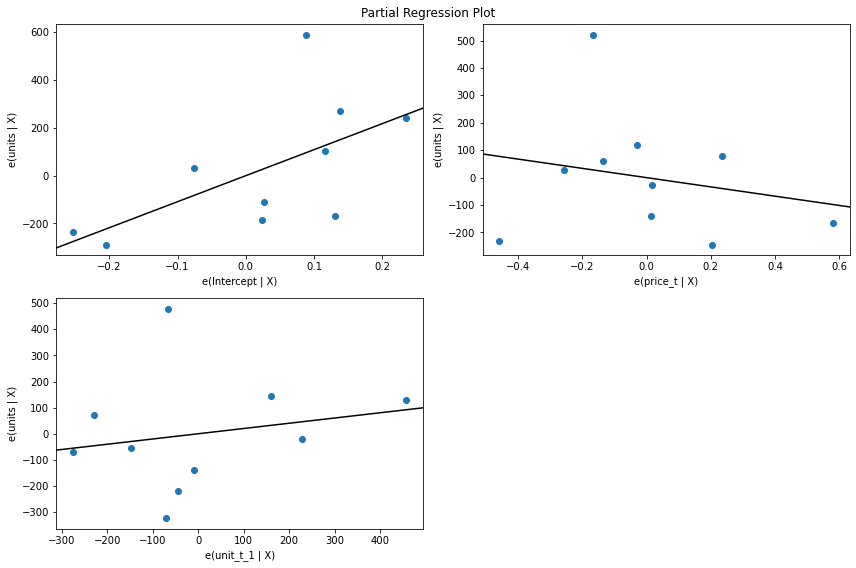

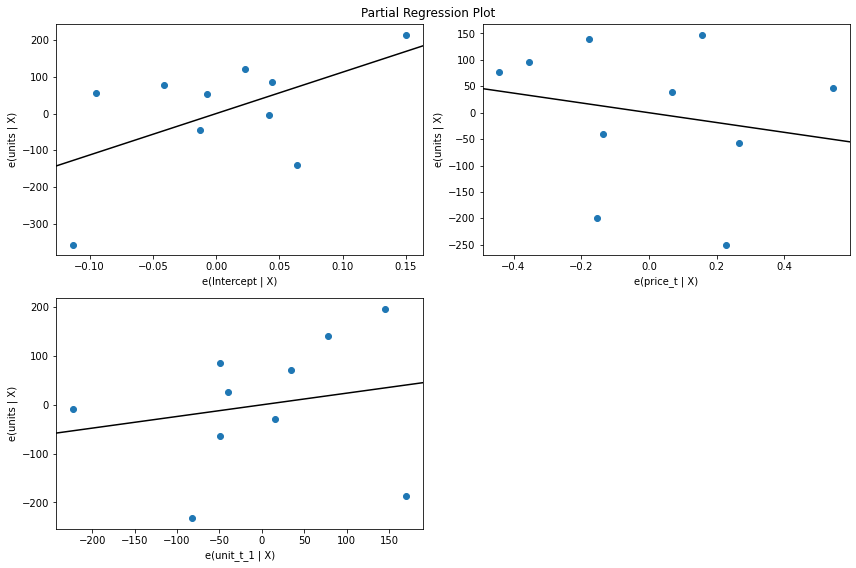

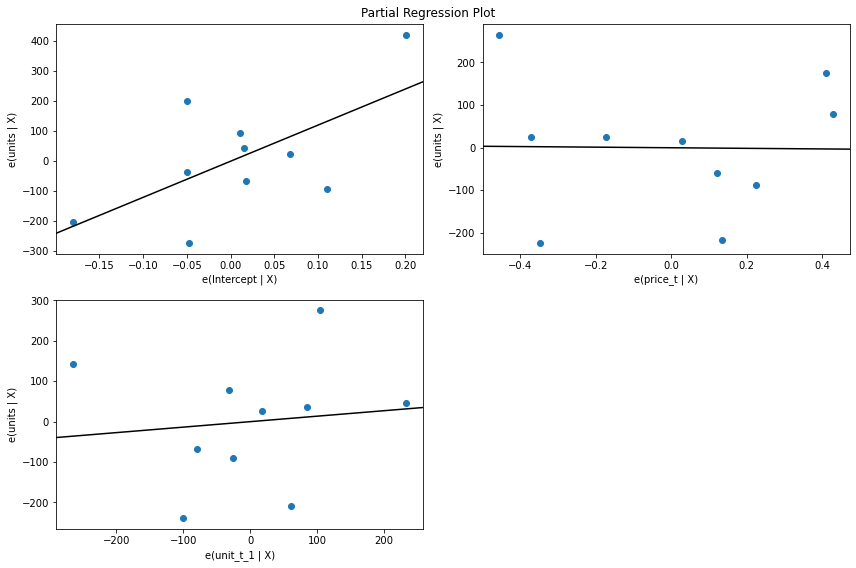

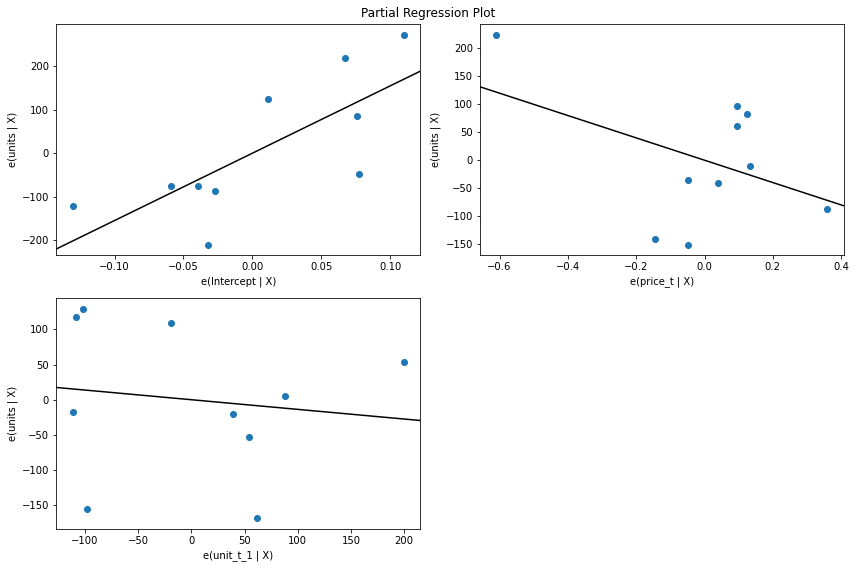

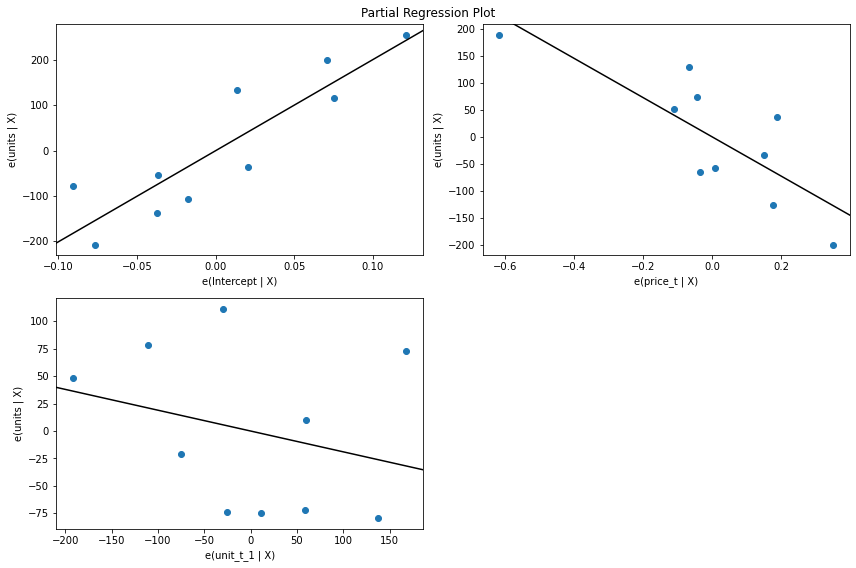

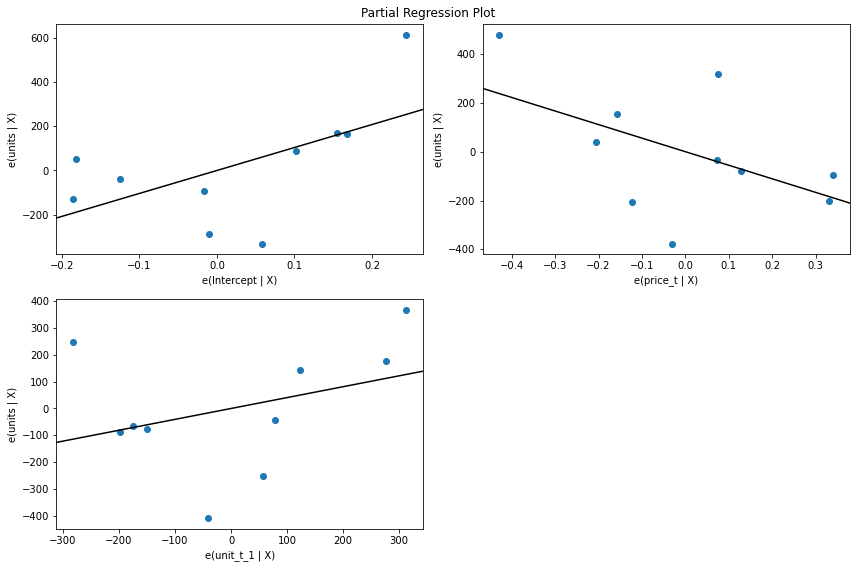

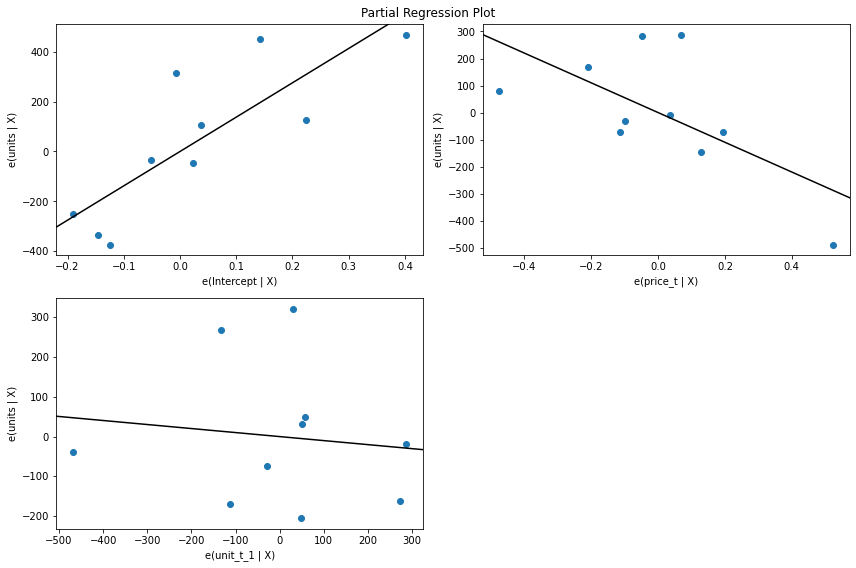

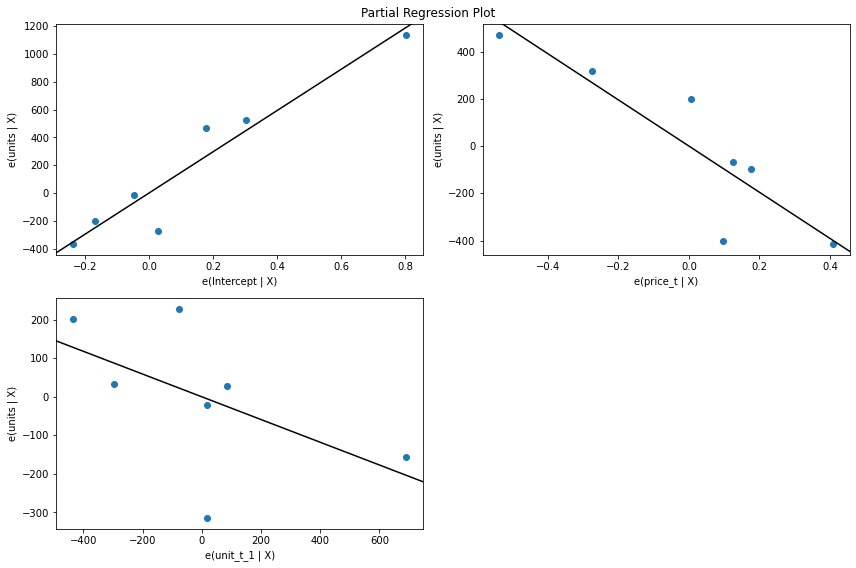

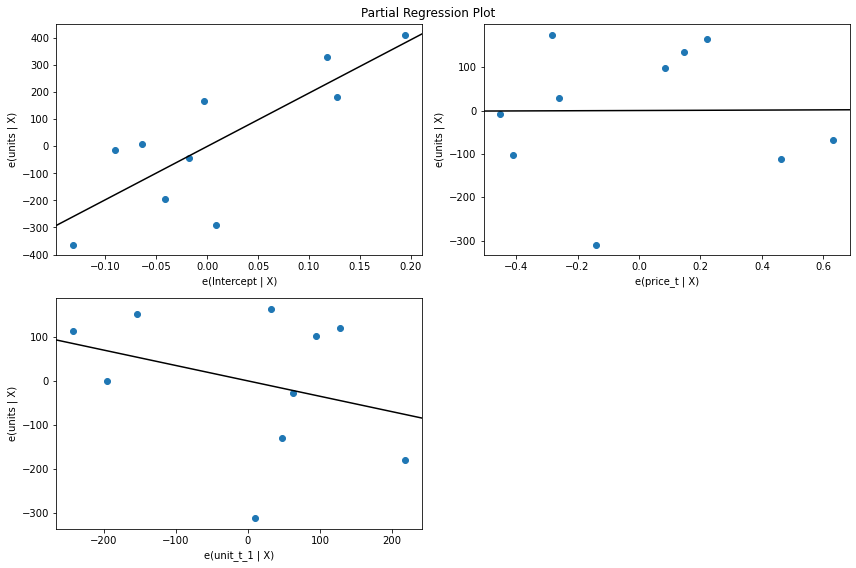

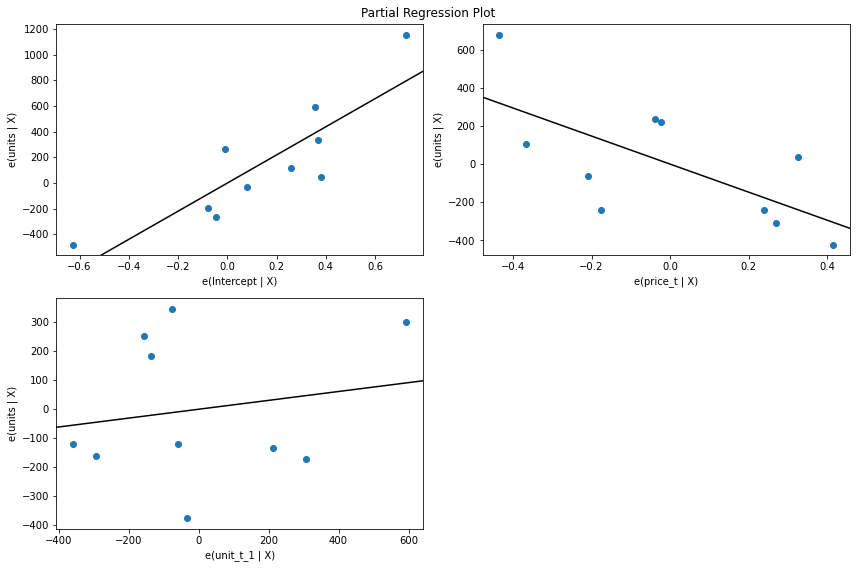

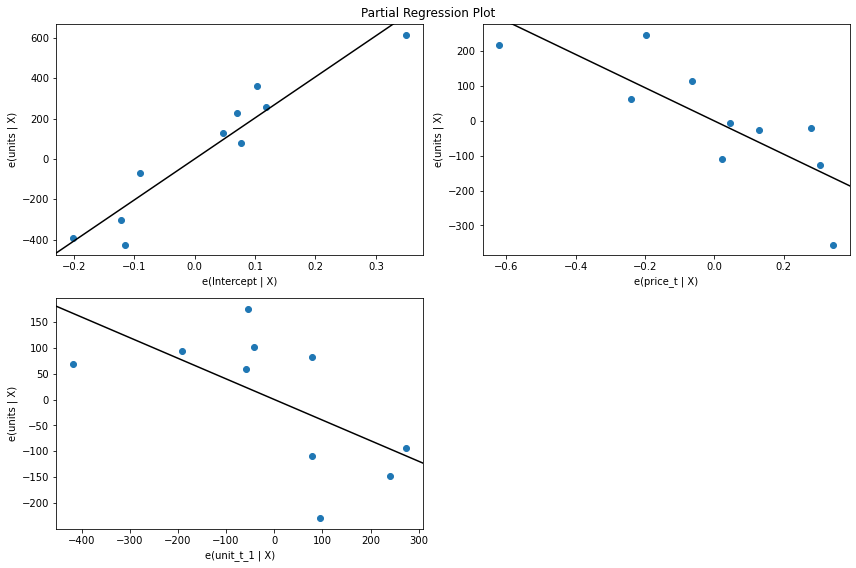

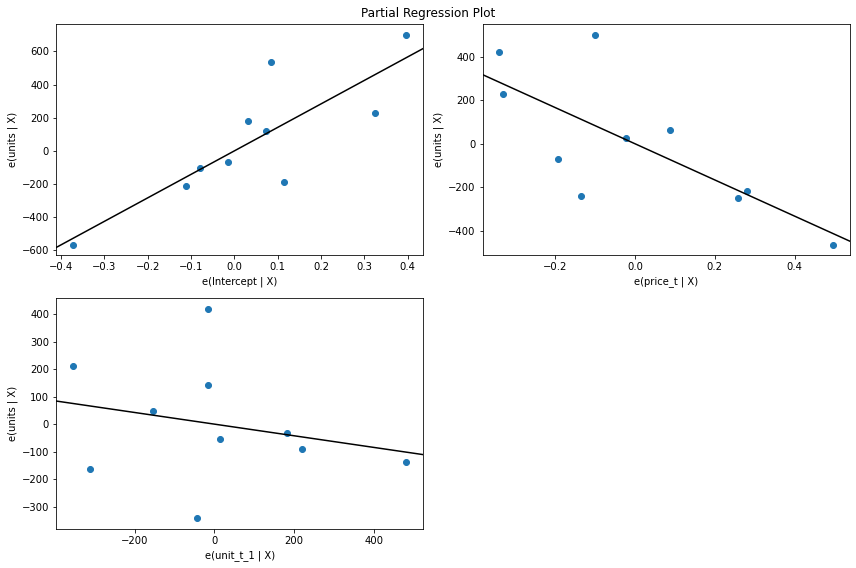

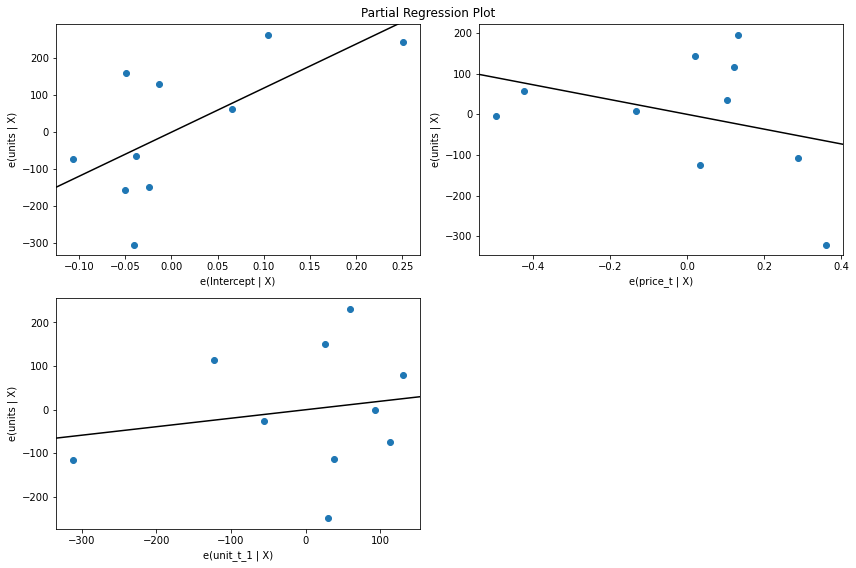

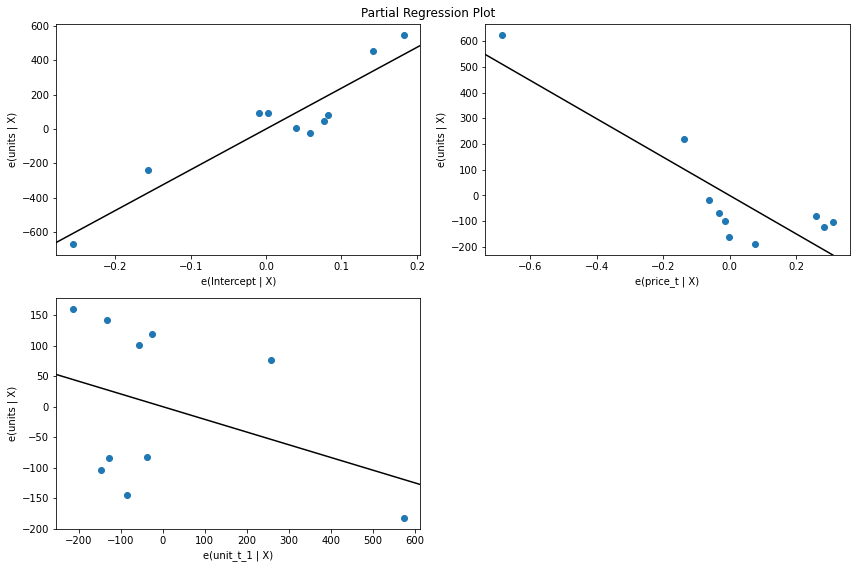

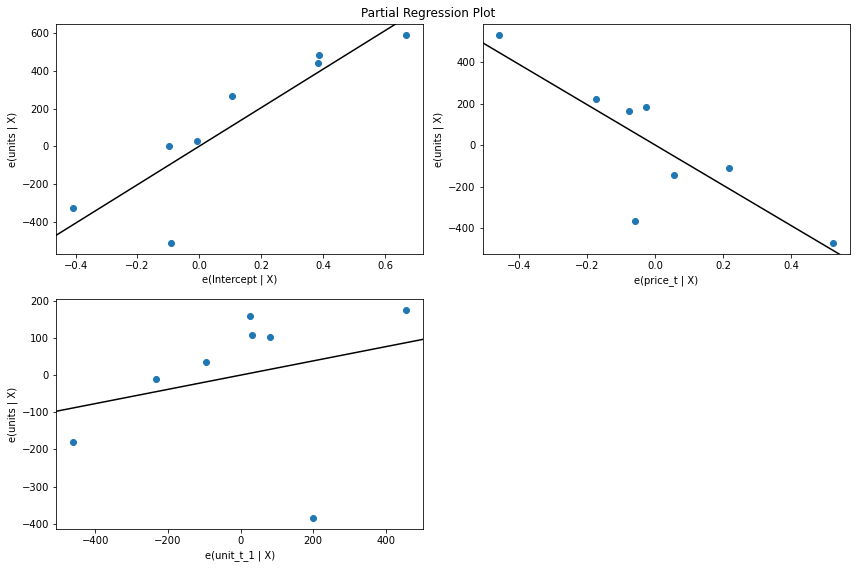

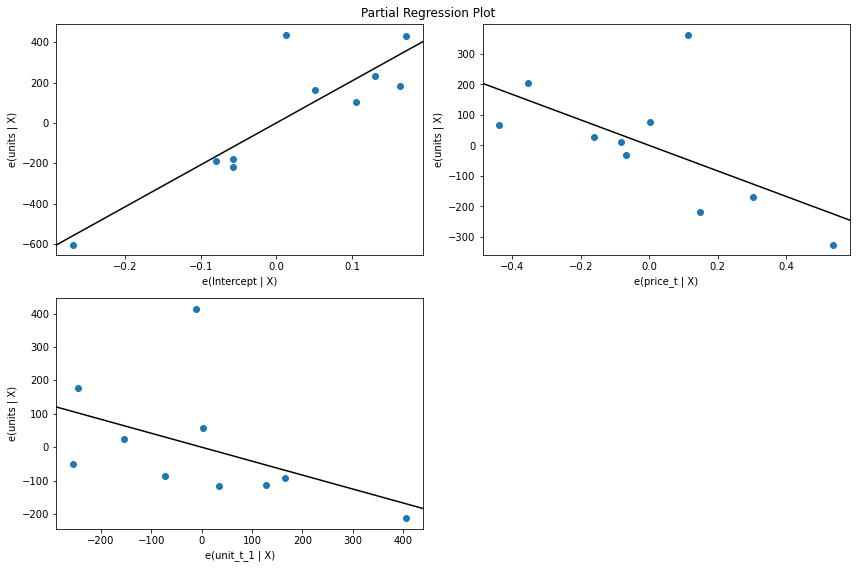

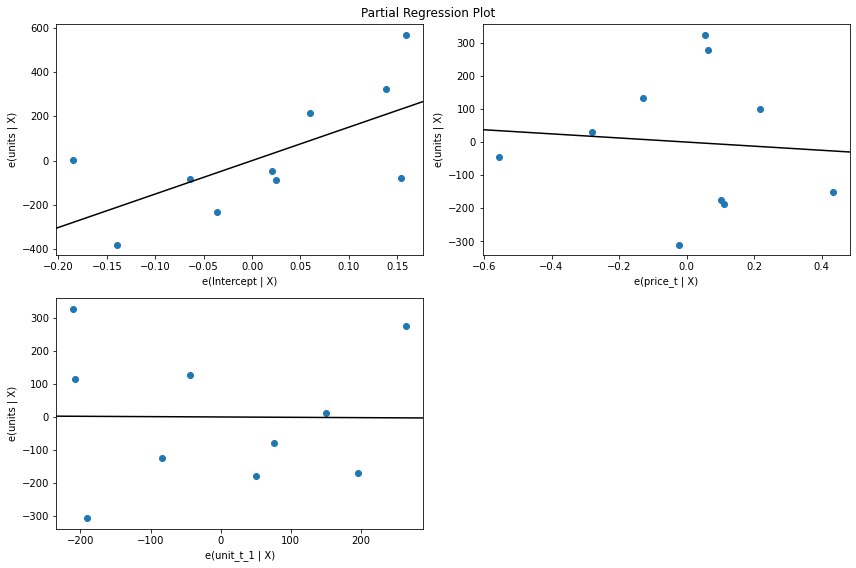

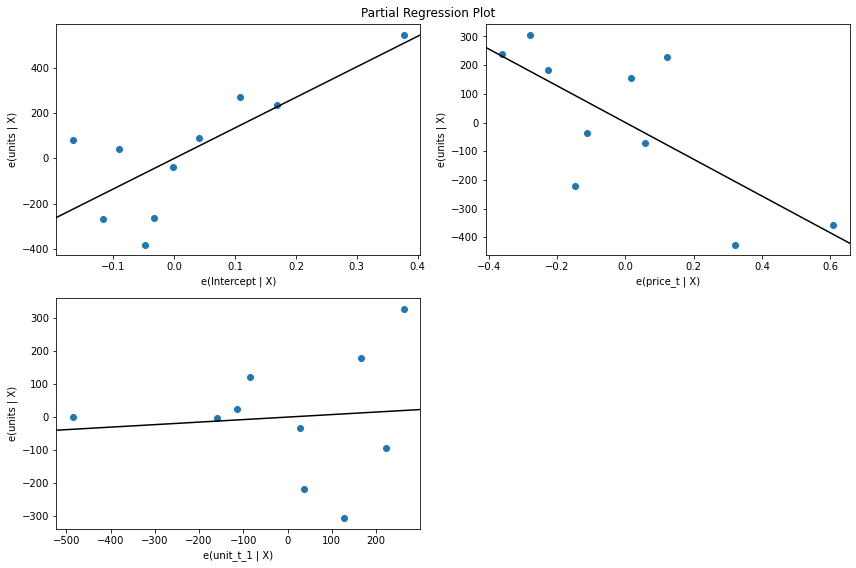

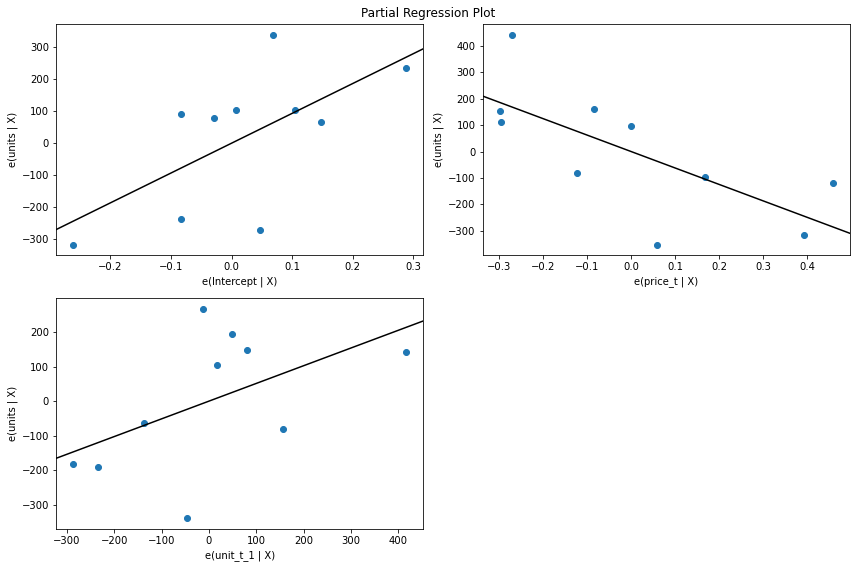

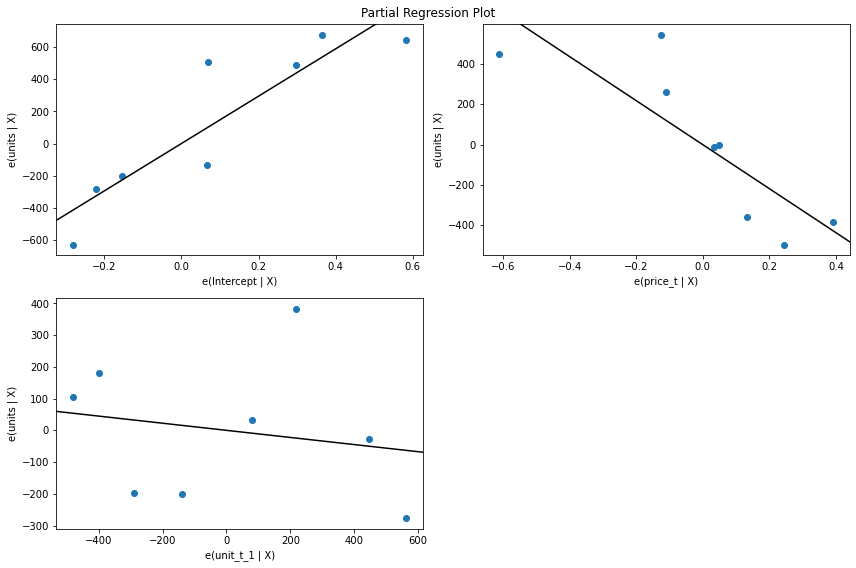

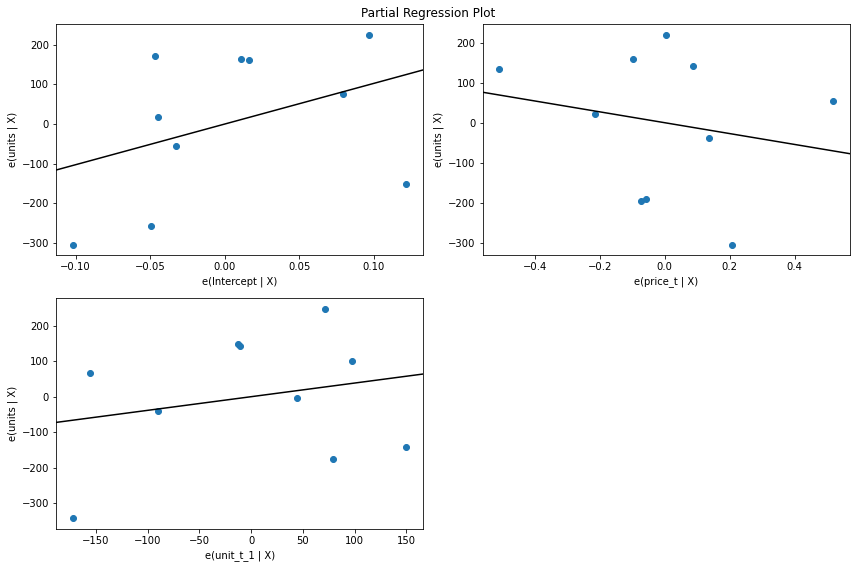

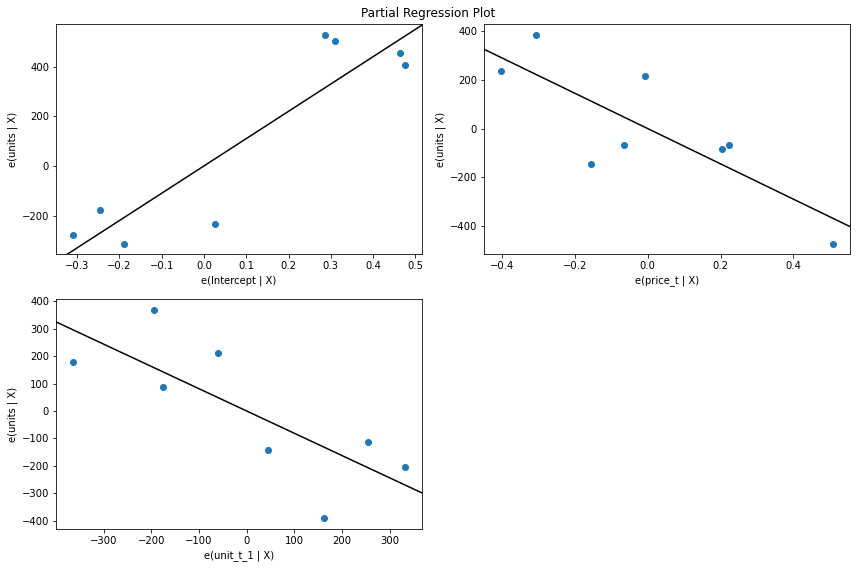

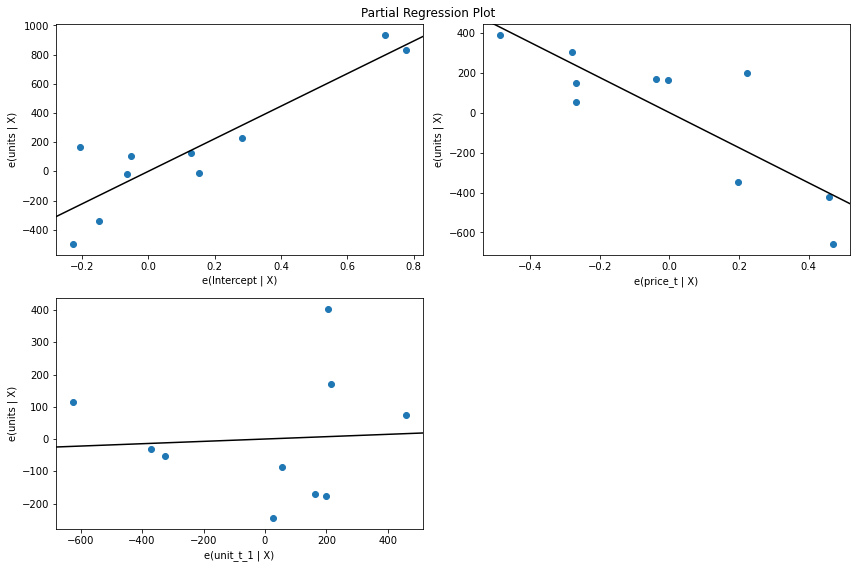

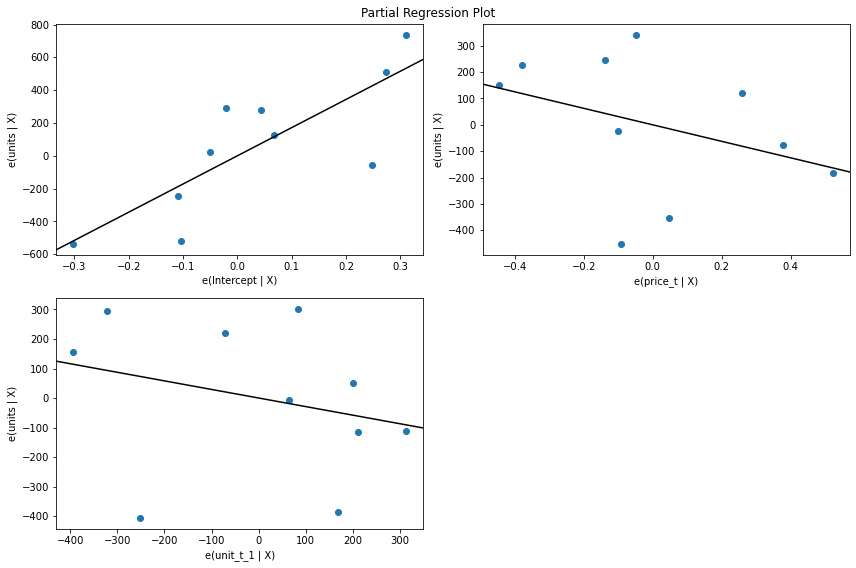

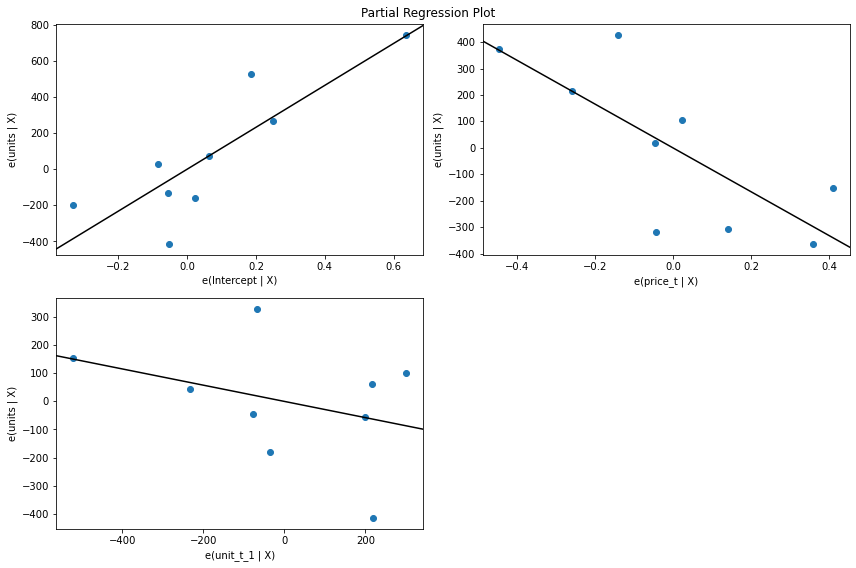

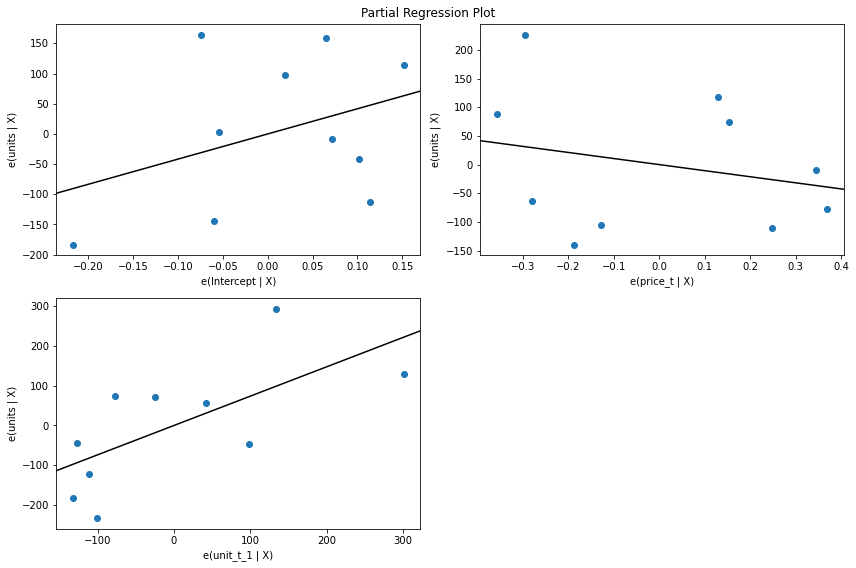

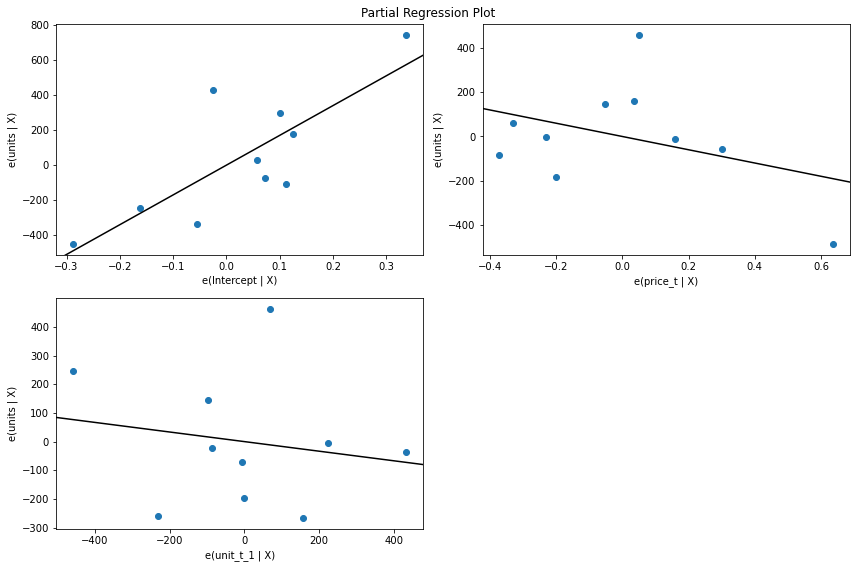

In [26]:
#model with unit t-1
for k in range(0,27):
    train_data=d[k]
    train_data["price"] = normalize_data(train_data["price"])
    train_data=train_data.drop(["product_id","date","Unnamed: 0"],axis=1)
    train_data=pd.concat([train_data.price, train_data.units.shift(),train_data.units], axis=1)
    train_data.columns = ['price_t', 'unit_t_1', 'units']
    train_data['unit_t_1'].fillna(train_data['units'].mean(), inplace=True)
    
    model = ols("units ~ price_t+unit_t_1", data=train_data).fit()
    
    print("Product",k)
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    
    print("-----------------------------------------------------------------------")



In [80]:
#model with price t-1
for k in range(0,27):
    train_data=d[k]
    train_data["price"] = normalize_data(train_data["price"])
    train_data=train_data.drop(["product_id","date","Unnamed: 0"],axis=1)
    train_data=pd.concat([train_data.price, train_data.price.shift(),train_data.units], axis=1)
    train_data.columns = ['price_t', 'price_t_1', 'units']
    
    #when I used lag t-1, I have a NaN value of price. I replace that nan with mean of the price column.
    train_data['price_t_1'].fillna(train_data['price_t'].mean(), inplace=True)
    
    print("Product",k)
    
    train_data["price_t"] = normalize_data(train_data["price_t"])
    train_data["price_t_1"] = normalize_data(train_data["price_t_1"])
    
    
    y=train_data.units
    X=train_data.drop(["units"],axis=1)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


    model = LassoCV(cv=3, max_iter=10000)

    # Fit model
    model.fit(X_train, y_train)

    lasso_best = Lasso(alpha=model.alpha_)
    lasso_best.fit(X_train, y_train)

    print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
    print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))
   
    print("-----------------------------------------------------------------------")



Product 0
R squared training set 18.6
R squared test set -46.69
-----------------------------------------------------------------------
Product 1
R squared training set 66.9
R squared test set -1342.18
-----------------------------------------------------------------------
Product 2
R squared training set 63.47
R squared test set -121.72
-----------------------------------------------------------------------
Product 3
R squared training set 32.04
R squared test set -353.48
-----------------------------------------------------------------------
Product 4
R squared training set 74.1
R squared test set -166.06
-----------------------------------------------------------------------
Product 5
R squared training set 28.4
R squared test set -6280.96
-----------------------------------------------------------------------
Product 6
R squared training set 67.05
R squared test set -223.36
-----------------------------------------------------------------------
Product 7
R squared training set 79.6

However they assume all of the products are independent, whereas actually they are all yoghurts so maybe they are not. I try to improve these individual models by making a global model. i.e. consider all of the products together. You could then have a model 

Unit_t = beta_1 * Brand + beta_2 * Flavour + beta_3 * volume_place_yohurt + beta_4 * packsize + beta_5 * Price_t  + beta_0 


In [103]:
df=sales.merge(product,on="product_id")

In [104]:
df=df.drop(["Unnamed: 0_x","Unnamed: 0_y"],axis=1)

In [105]:
df

date  product_id  price   units    brand     flavour  \
0    2020-01-01           0   4.65  1126.0  Mueller   blueberry   
1    2020-01-02           0   4.76  1205.0  Mueller   blueberry   
2    2020-01-03           0   5.22  1007.0  Mueller   blueberry   
3    2020-01-04           0   5.45  1282.0  Mueller   blueberry   
4    2020-01-05           0   3.33  1037.0  Mueller   blueberry   
..          ...         ...    ...     ...      ...         ...   
255  2020-01-06          26   3.18  1524.0    Oikos  strawberry   
256  2020-01-07          26   2.81  1153.0    Oikos  strawberry   
257  2020-01-08          26   5.00   913.0    Oikos  strawberry   
258  2020-01-09          26   3.38  1603.0    Oikos  strawberry   
259  2020-01-10          26   4.15  1263.0    Oikos  strawberry   

     volume_per_joghurt_g  packsize  
0                     150         6  
1                     150         6  
2                     150         6  
3                     150         6  
4                     150         6  
..                    ...       ...  
255                   500         1  
256                   500         1  
257                   500         1  
258                   500         1  
259                   500         1  

[260 rows x 8 columns]

In [106]:
#creating dummy variables for categorical features
df_dumm = pd.get_dummies(df, columns=["brand","flavour"], drop_first = True)

In [107]:
df_dumm["price"] = normalize_data(df_dumm["price"])

In [108]:
y=df_dumm.units
X=df_dumm.drop(["units","date","product_id"],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

r_sq = model.score(X_train, y_train)

In [110]:
r_sq

0.6711581012423434

Prediction of the next days

Firstly, I will generate price for future. I will use existing price distribution of a product. Then, I will make predictions for given price data. 

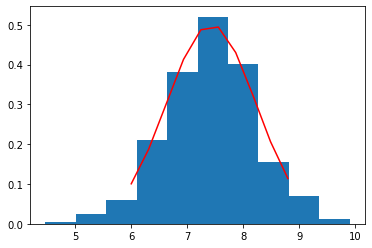

In [182]:
data = np.random.normal(7.4, 0.8, 1000)

mean, var  = scipy.stats.distributions.norm.fit(data)

x = np.linspace(6,8.8,10)

fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

plt.hist(data, density=True)
plt.plot(x,fitted_data,'r-')

In [183]:
x=x.reshape(-1, 1)

In [184]:
train_data=sales[sales.product_id==14] #I choose a random prod
train_data=train_data.drop(["product_id","date","Unnamed: 0"],axis=1)


y=train_data.units
X=train_data.drop(["units"],axis=1)
print(X)
print("-----\n     units")
print(y)

model = LassoCV(cv=2, max_iter=10000)

# Fit model
model.fit(X, y)

lasso_best = Lasso(alpha=0)
lasso_best.fit(X, y)

print('\n\nR squared: ', round(lasso_best.score(X, y)*100, 2))



     price
137   8.76
138   7.02
139   6.08
140   7.73
141   7.36
142   8.13
143   6.75
144   7.47
-----
     units
137     215.0
138     630.0
139    1229.0
140     748.0
141     857.0
142     545.0
143     936.0
144     274.0
Name: units, dtype: float64


R squared:  67.53


In [185]:
lasso_best.predict(x)

array([1154.20733154, 1049.59529391,  944.98325629,  840.37121866,
        735.75918104,  631.14714341,  526.53510579,  421.92306816,
        317.31103054,  212.69899292])

For the all product, I predicted next 10 days units of sales

Product: 0
[1361.35164611 1339.19235399 1317.03306187 1294.87376975 1272.71447763
 1250.55518551 1228.39589339 1206.23660127 1184.07730915 1161.91801703]
------------------

Product: 1
[1475.98843897 1464.5770403  1453.16564163 1441.75424296 1430.3428443
 1418.93144563 1407.52004696 1396.10864829 1384.69724963 1373.28585096]
------------------

Product: 2
[1375.56545229 1377.3260899  1379.0867275  1380.8473651  1382.6080027
 1384.3686403  1386.1292779  1387.88991551 1389.65055311 1391.41119071]
------------------

Product: 3
[1360.91061692 1341.49805901 1322.08550111 1302.67294321 1283.2603853
 1263.8478274  1244.4352695  1225.02271159 1205.61015369 1186.19759579]
------------------

Product: 4
[1712.8082164  1675.20536972 1637.60252304 1599.99967637 1562.39682969
 1524.79398301 1487.19113633 1449.58828965 1411.98544297 1374.38259629]
------------------

Product: 5
[1569.26626131 1530.66841849 1492.07057567 1453.47273284 1414.87489002
 1376.2770472  1337.67920437 1299.08136155 1260.483

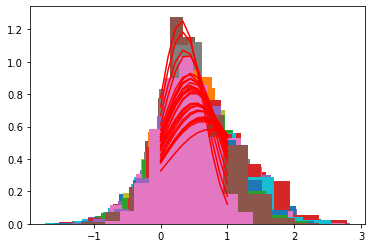

In [195]:
for k in range(0,27):
    train_data=d[k]
    mean_price=train_data["price"].mean()
    std_price=train_data["price"].std()
    
    data = np.random.normal(mean_price, mean_price, 1000)

    mean, var  = scipy.stats.distributions.norm.fit(data)

    x = np.linspace(train_data["price"].min(),train_data["price"].max(),10)

    fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

    plt.hist(data, density=True)
    plt.plot(x,fitted_data,'r-')
    
    x=x.reshape(-1, 1)
    
    train_data=train_data.drop(["product_id","date","Unnamed: 0"],axis=1)


    y=train_data.units
    X=train_data.drop(["units"],axis=1)


    model = LassoCV(cv=2, max_iter=10000)

    # Fit model
    model.fit(X, y)

    lasso_best = Lasso(alpha=0)
    lasso_best.fit(X, y)
    print("Product:",k)
    print(lasso_best.predict(x))
    print("------------------\n")

